In [3]:
%pip install pandas mysql-connector-python networkx matplotlib

  Using cached pandas-2.2.3-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached mysql_connector_python-9.2.0-cp313-cp313-manylinux_2_28_x86_64.whl.metadata (6.0 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached matplotlib-3.10.1-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp313-cp313-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (101 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pillow-11.1.0-cp313-cp313-manylinux_2_28_x86_64.whl.metadata (9.1 kB)
Using cached pandas-2.2.3-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.7 MB)
Using cached 

In [4]:
import pandas as pd
import mysql.connector
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def create_graph_from_sql(query, host="192.168.30.15", user="nms", password="Nms@1234", database="cnmsip"):
    """
    Create a NetworkX graph from SQL query data
    
    Parameters:
    query : str
        SQL query to fetch network data
    host, user, password, database : str
        MySQL connection parameters
        
    Returns:
    --------
    G : NetworkX graph
        Graph created from the SQL data
    df : pandas DataFrame
        DataFrame containing the original SQL data
    """
    # Connect to MySQL
    conn = mysql.connector.connect(
        host=host,
        user=user,
        password=password,
        database=database
    )
    
    # Fetch data
    print(f"Executing query: {query}")
    df = pd.read_sql(query, conn)
    conn.close()
    
    print(f"Query returned {len(df)} rows")
    print(df.head())
    
    # Create an empty graph
    G = nx.Graph()
    
    # Add nodes and edges based on the data
    # Assuming aendip and bendip are node identifiers, and we're connecting them
    for _, row in df.iterrows():
        # Get node identifiers
        a_node = row['aendip']
        b_node = row['bendip']
        
        # Add nodes with attributes
        G.add_node(a_node, name=row['aendname'])
        G.add_node(b_node, name=row['bendname'])
        
        # Add other node attributes if available
       
        # Add edge with attributes
        
        G.add_edge(a_node, b_node,)
    
    print(f"Created graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")
    return G, df

In [5]:
query = """
SELECT 
*
FROM topology_data_logical 
WHERE physicalringname = "Berla_Pink";
"""
G_log,pd_log = create_graph_from_sql(query)

Executing query: 
SELECT 
*
FROM topology_data_logical 
WHERE physicalringname = "Berla_Pink";

Query returned 34 rows


/tmp/ipykernel_4421/3961269868.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


     id physicalringname      lrname    aendname    bendname  distance  \
0  1758       BERLA_Pink  Ring no.07    LENGVARA       SARDA      3.80   
1  1759       BERLA_Pink  Ring no.07       SARDA     JAMGAON      4.06   
2  1760       BERLA_Pink  Ring no.07     JAMGAON     BAHINGA     21.19   
3  1761       BERLA_Pink  Ring no.07     BAHINGA  KHAMHARIYA     29.16   
4  1762       BERLA_Pink  Ring no.07  KHAMHARIYA  MOHABHATTA     12.69   

  ibclink priority  aendid  bendid  ...        bendip        aendip  \
0    None      Low    2813    2788  ...  10.128.17.72  10.128.17.58   
1    None      Low    2788    2791  ...  10.128.17.39  10.128.17.72   
2    None      Low    2791    2799  ...   10.128.17.5  10.128.17.39   
3    None      Low    2799    2800  ...  10.128.17.45   10.128.17.5   
4    None      Low    2800    2817  ...  10.128.17.60  10.128.17.45   

                                    physicalsegments remarks confirmed  \
0                                              12995  

In [207]:
query = """
SELECT 
*
FROM topology_data_physical 
WHERE ringname = "Berla_Pink";
"""
G_phy, pd_phy = create_graph_from_sql(query)

Executing query: 
SELECT 
*
FROM topology_data_physical 
WHERE ringname = "Berla_Pink";

Query returned 34 rows
     id    ringname ringnum ringcolor  segmentid  aendname   bendname  isspur  \
0  2852  BERLA_Pink    None      None      12993     BERLA    TARALIM       0   
1  2853  BERLA_Pink    None      None      12994   TARALIM   LENGVARA       0   
2  2854  BERLA_Pink    None      None      12995  LENGVARA      SARDA       0   
3  2855  BERLA_Pink    None      None      12996     SARDA   BHATGAON       0   
4  2856  BERLA_Pink    None      None      12997  BHATGAON  BAWANLAKH       0   

   isjc  aendid  bendid        aendip        bendip  color  \
0     0    2511    3052   10.128.0.16  10.128.17.82  Green   
1     0    3052    2813  10.128.17.82  10.128.17.58  Green   
2     0    2813    2788  10.128.17.58  10.128.17.72  Green   
3     0    2788    2760  10.128.17.72  10.128.17.14  Green   
4     0    2760    2752  10.128.17.14  10.128.17.86  Green   

              logtime      a

/tmp/ipykernel_4708/3961269868.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [14]:
print("Number of nodes in G_phy:", G_phy.number_of_nodes())
print("Number of edges in G_phy:", G_phy.number_of_edges())

Number of nodes in G_phy: 32
Number of edges in G_phy: 34


In [220]:
def parse_xy(coord_str):
    """Parse a coordinate string in the form 'x;y' into a dict with keys 'x' and 'y'."""
    try:
        x, y = map(float, coord_str.split(';'))
        return {'x': x, 'y': y}
    except Exception as e:
        print(f"Error parsing coordinates '{coord_str}': {e}")
        return None

def create_combined_physical_logical_graph(G_phy, logical_connections_df, pd_phy):
    """
    Create a MultiGraph with logical overlays and store XY coordinates from pd_phy
    
    Parameters:
    -----------
    G_phy : NetworkX Graph
        The physical topology graph
    logical_connections_df : DataFrame
        DataFrame containing logical connections (with aendip, bendip, etc.)
    pd_phy : DataFrame
        DataFrame containing physical topology data with 'aendxy' and 'bendxy' columns
        
    Returns:
    --------
    G_combined : NetworkX MultiGraph
        Graph with logical connections (logical segments) and node XY coordinates
    """
    import networkx as nx
    
    # Create a MultiGraph to hold both types of connections
    G_combined = nx.MultiGraph()
    
    # Add all nodes from G_phy (and later update with XY coordinates)
    for node, attrs in G_phy.nodes(data=True):
        G_combined.add_node(node, **attrs)
    
    # Before adding logical edges, update nodes with XY coordinates from pd_phy.
    # We assume that for each row in pd_phy, the coordinates apply to the end nodes.
    for idx, row in pd_phy.iterrows():
        a_node = row.get('aendip')
        b_node = row.get('bendip')
        a_name = row.get('aendname')
        b_name = row.get('bendname')
        G_combined.nodes[a_node]['name'] = a_name
        G_combined.nodes[b_node]['name'] = b_name
        # Parse and update aendxy for a_node
        a_coords = parse_xy(row.get('aendxy', ''))
        if a_coords and a_node in G_combined.nodes:
            G_combined.nodes[a_node].update(a_coords)
        
        # Parse and update bendxy for b_node
        b_coords = parse_xy(row.get('bendxy', ''))
        if b_coords and b_node in G_combined.nodes:
            G_combined.nodes[b_node].update(b_coords)
    
    # Note: We are not adding physical edges in G_combined
    
    # For each logical connection, find the physical path and add logical edges (segments)
    for _, row in logical_connections_df.iterrows():
        source = row['aendip']
        target = row['bendip']
    
        # Skip if nodes don't exist in the physical graph
        if source not in G_phy.nodes or target not in G_phy.nodes:
            print(f"Warning: Nodes {source} or {target} not in physical graph")
            continue
        
        # Find physical path for this logical connection using the physical graph (G_phy)
        try:
            physical_path = nx.shortest_path(G_phy, source, target)
            
            # Add edges between consecutive nodes in the physical path as logical segments
            for i in range(len(physical_path)-1):
                node1 = physical_path[i]
                node2 = physical_path[i+1]
                
                # Create a unique key for this segment of the logical path
                segment_key = f"{source}-{target}_{i}"
                
                if not G_combined.has_edge(node1, node2, key=segment_key):
                    G_combined.add_edge(
                        node1,
                        node2,
                        key=segment_key,
                        connection_type='logical_segment',
                        logical_name=row.get('lrname', 'unknown'),
                        segment_index=i,
                        source_endpoint=source,
                        target_endpoint=target
                    )
            
        except nx.NetworkXNoPath:
            print(f"No physical path found between {source} and {target}")
    
    print(f"Created combined graph with {G_combined.number_of_nodes()} nodes and {G_combined.number_of_edges()} edges")
    return G_combined

In [221]:
G_combined = create_combined_physical_logical_graph(G_phy,pd_log, pd_phy)

Created combined graph with 32 nodes and 110 edges


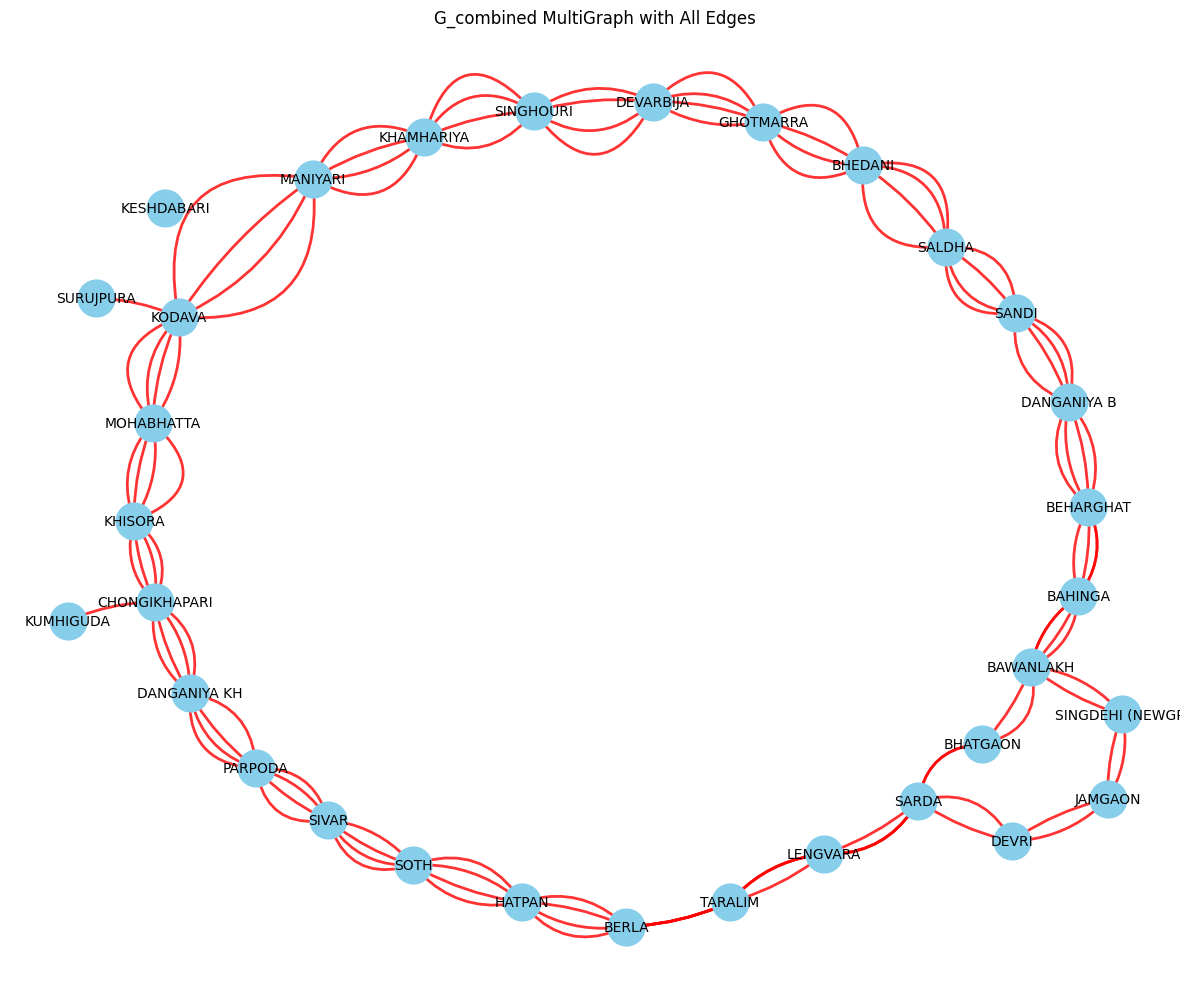

In [222]:
import matplotlib.pyplot as plt
import networkx as nx

# Compute positions for all nodes. 
# If your nodes already have 'x' and 'y' attributes, you can use them:
pos = {}
for node, data in G_combined.nodes(data=True):
    if 'x' in data and 'y' in data:
        pos[node] = (data['x'], data['y'])
if len(pos) < G_combined.number_of_nodes():
    # Fallback to spring layout for nodes missing fixed positions
    pos.update(nx.spring_layout(G_combined, seed=42))

plt.figure(figsize=(12, 10))
node_labels = {}
for node, data in G_combined.nodes(data=True):
    node_labels[node] = data.get('name', str(node))  
# Draw nodes and labels
nx.draw_networkx_nodes(G_combined, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_labels(G_combined, pos, font_size=10,labels=node_labels)

# Draw each edge individually to handle multiple (parallel) edges.
for u, v, key, data in G_combined.edges(data=True, keys=True):
    # Determine curvature (rad) based on the key. If key contains an index, use it.
    try:
        # Assume key is formatted like "source-target_i"
        index = int(key.split('_')[-1])
        # Alternate curvature sign for even/odd indices to offset edges on both sides
        rad = (0.1 * (index + 1)) * (1 if index % 2 == 0 else -1)
    except Exception:
        rad = 0.1

    # Choose edge color based on connection type
    conn_type = data.get('connection_type', 'unknown')
    if conn_type == 'logical_segment':
        edge_color = 'red'
    else:
        edge_color = 'black'

    # Draw this single edge with a curved connection style
    nx.draw_networkx_edges(
        G_combined, pos,
        edgelist=[(u, v)],
        edge_color=edge_color,
        connectionstyle=f'arc3, rad={rad}',
        width=2,
        alpha=0.8
    )

plt.title("G_combined MultiGraph with All Edges")
plt.axis('off')
plt.tight_layout()
plt.show()

In [22]:
def remove_logical_connection(G, source_ip, target_ip):
    """
    Remove all edges corresponding to a specific logical connection from the graph.
    
    Parameters:
    -----------
    G : NetworkX MultiGraph
        The graph containing logical connections
    source_ip : str
        The source endpoint IP of the logical connection to remove
    target_ip : str
        The target endpoint IP of the logical connection to remove
        
    Returns:
    --------
    G : NetworkX MultiGraph
        The modified graph with the specified logical connection removed
    """
    # Create a list of edges to remove (can't modify during iteration)
    edges_to_remove = []
    
    # Find all edges that are part of this logical connection
    for u, v, key, data in G.edges(data=True, keys=True):
        # Option 1: Check by key format
        if key.startswith(f"{source_ip}-{target_ip}_") or key.startswith(f"{target_ip}-{source_ip}_"):
            edges_to_remove.append((u, v, key))
        
        # Option 2: Check by source/target endpoint attributes
        elif (data.get('connection_type') == 'logical_segment' and 
              ((data.get('source_endpoint') == source_ip and data.get('target_endpoint') == target_ip) or
               (data.get('source_endpoint') == target_ip and data.get('target_endpoint') == source_ip))):
            edges_to_remove.append((u, v, key))
    
    # Remove the edges
    for u, v, key in edges_to_remove:
        G.remove_edge(u, v, key)
    
    print(f"Removed {len(edges_to_remove)} edges for logical connection {source_ip} - {target_ip}")
    return G

In [28]:
pd_phy

,id,ringname,ringnum,ringcolor,segmentid,aendname,bendname,isspur,isjc,aendid,bendid,aendip,bendip,color,logtime,aendxy,bendxy,bypass,bypassgp,bypass_lrdata
0,2852,BERLA_Pink,None,None,12993,BERLA,TARALIM,0,0,2511,3052,10.128.0.16,10.128.17.82,Green,2025-03-18 13:16:53,349;-2331,550;-2279,0,None,None
1,2853,BERLA_Pink,None,None,12994,TARALIM,LENGVARA,0,0,3052,2813,10.128.17.82,10.128.17.58,Green,2025-03-18 13:16:53,550;-2279,732;-2177,0,None,None
2,2854,BERLA_Pink,None,None,12995,LENGVARA,SARDA,0,0,2813,2788,10.128.17.58,10.128.17.72,Green,2025-03-18 13:16:53,732;-2177,915;-2063,0,None,None
3,2855,BERLA_Pink,None,None,12996,SARDA,BHATGAON,0,0,2788,2760,10.128.17.72,10.128.17.14,Green,2025-03-18 13:16:53,915;-2063,1039;-1942,0,None,None
4,2856,BERLA_Pink,None,None,12997,BHATGAON,BAWANLAKH,0,0,2760,2752,10.128.17.14,10.128.17.86,Green,2025-03-18 13:16:53,1039;-1942,1133;-1777,0,None,None
5,2857,BERLA_Pink,None,None,12998,BAWANLAKH,BAHINGA,0,0,2752,2799,10.128.17.86,10.128.17.5,Green,2025-03-18 13:16:53,1133;-1777,1225;-1627,0,None,None
6,2858,BERLA_Pink,None,None,12999,BAHINGA,BEHARGHAT,0,0,2799,2746,10.128.17.5,10.128.17.87,Green,2025-03-18 13:16:53,1225;-1627,1244;-1436,0,None,None
7,2859,BERLA_Pink,None,None,13000,BEHARGHAT,DANGANIYA B,0,0,2746,2781,10.128.17.87,10.128.17.24,Green,2025-03-18 13:16:53,1244;-1436,1206;-1213,0,None,None
8,2860,BERLA_Pink,None,None,13001,DANGANIYA B,SANDI,0,0,2781,2794,10.128.17.24,10.128.17.70,Green,2025-03-18 13:16:53,1206;-1213,1104;-1023,0,None,None
9,2861,BERLA_Pink,None,None,13002,SANDI,SALDHA,0,0,2794,2803,10.128.17.70,10.128.17.69,Green,2025-03-18 13:16:53,1104;-1023,968;-882,0,None,None


Removed 2 edges for logical connection 10.128.17.91 - 10.128.17.28
Edge count before: 108, after: 106


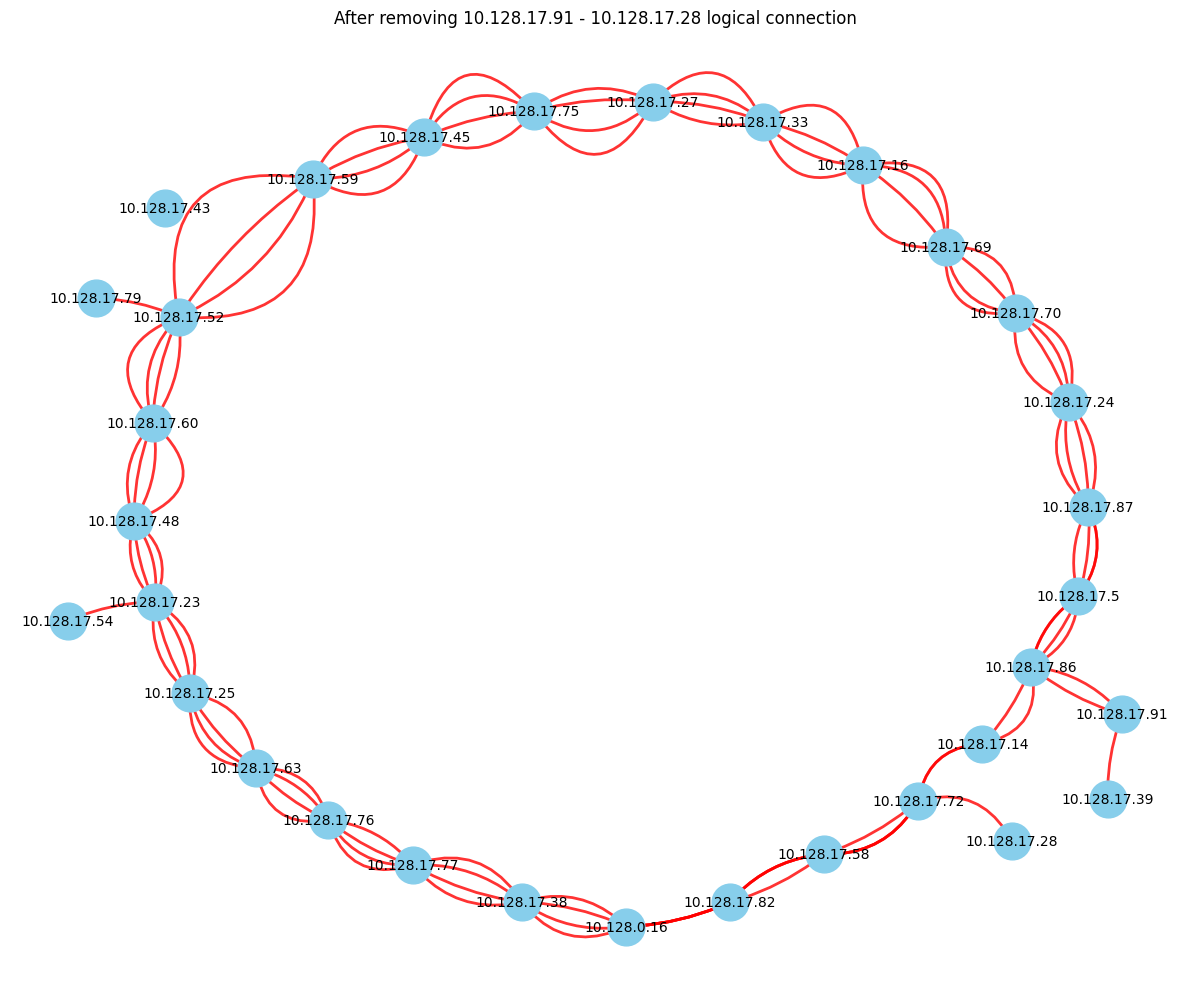

In [47]:
target_ip  = "10.128.17.28"  # Example IP (replace with actual value)
source_ip= "10.128.17.91"  # Example IP (replace with actual value)

# Get count of edges before removal
edge_count_before = G_combined.number_of_edges()

# Remove the logical connection
G_combined = remove_logical_connection(G_combined, source_ip, target_ip)

# Get count of edges after removal
edge_count_after = G_combined.number_of_edges()
print(f"Edge count before: {edge_count_before}, after: {edge_count_after}")

# Replot the graph to see the result
plt.figure(figsize=(12, 10))

# Draw nodes
nx.draw_networkx_nodes(G_combined, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_labels(G_combined, pos, font_size=10)

# Draw remaining edges
for u, v, key, data in G_combined.edges(data=True, keys=True):
    try:
        index = int(key.split('_')[-1])
        rad = (0.1 * (index + 1)) * (1 if index % 2 == 0 else -1)
    except Exception:
        rad = 0.1
        
    conn_type = data.get('connection_type', 'unknown')
    edge_color = 'red' if conn_type == 'logical_segment' else 'black'
    
    nx.draw_networkx_edges(
        G_combined, pos,
        edgelist=[(u, v)],
        edge_color=edge_color,
        connectionstyle=f'arc3, rad={rad}',
        width=2,
        alpha=0.8
    )

plt.title(f"After removing {source_ip} - {target_ip} logical connection")
plt.axis('off')
plt.tight_layout()
plt.show()

In [39]:
for node, data in G_combined.nodes(data=True):
    print(node, data)

10.128.0.16 {'name': 'BERLA', 'x': 349.0, 'y': -2331.0}
10.128.17.82 {'name': 'TARALIM', 'x': 550.0, 'y': -2279.0}
10.128.17.58 {'name': 'LENGVARA', 'x': 732.0, 'y': -2177.0}
10.128.17.72 {'name': 'SARDA', 'x': 915.0, 'y': -2063.0}
10.128.17.14 {'name': 'BHATGAON', 'x': 1039.0, 'y': -1942.0}
10.128.17.86 {'name': 'BAWANLAKH', 'x': 1133.0, 'y': -1777.0}
10.128.17.5 {'name': 'BAHINGA', 'x': 1225.0, 'y': -1627.0}
10.128.17.87 {'name': 'BEHARGHAT', 'x': 1244.0, 'y': -1436.0}
10.128.17.24 {'name': 'DANGANIYA B', 'x': 1206.0, 'y': -1213.0}
10.128.17.70 {'name': 'SANDI', 'x': 1104.0, 'y': -1023.0}
10.128.17.69 {'name': 'SALDHA', 'x': 968.0, 'y': -882.0}
10.128.17.16 {'name': 'BHEDANI', 'x': 808.0, 'y': -709.0}
10.128.17.33 {'name': 'GHOTMARRA', 'x': 614.0, 'y': -616.0}
10.128.17.27 {'name': 'DEVARBIJA', 'x': 401.0, 'y': -573.0}
10.128.17.75 {'name': 'SINGHOURI', 'x': 170.0, 'y': -594.0}
10.128.17.45 {'name': 'KHAMHARIYA', 'x': -42.0, 'y': -649.0}
10.128.17.59 {'name': 'MANIYARI', 'x': -258.0,

In [50]:
def find_completely_missing_edges(G_single, G_multi):
    """
    Find node pairs that have an edge in G_single but have no edges at all in G_multi.
    
    Parameters:
    -----------
    G_single : NetworkX Graph
        A graph with single edges between nodes
    G_multi : NetworkX MultiGraph
        A multi-graph which may have multiple edges between nodes
        
    Returns:
    --------
    list of tuples
        List of (u, v, data) tuples representing edges in G_single that have
        no corresponding edge (of any kind) in G_multi
    """
    completely_missing = []
    
    # Check each edge in the single-edge graph
    for u, v, data in G_single.edges(data=True):
   # Check if there is ANY edge between these nodes in the multi-edge graph
        if not G_multi.has_edge(u, v):
            
            u_name = G_single.nodes[u].get('name', str(u))
            v_name = G_single.nodes[v].get('name', str(v)) 
            completely_missing.append((u, v,u_name,v_name ,data))
    return completely_missing

In [51]:
find_completely_missing_edges(G_phy, G_combined)

[('10.128.17.59', '10.128.17.43', 'MANIYARI', 'KESHDABARI', {}),
 ('10.128.17.43', '10.128.17.52', 'KESHDABARI', 'KODAVA', {}),
 ('10.128.17.39', '10.128.17.28', 'JAMGAON', 'DEVRI', {})]

In [52]:
pd_log

,id,physicalringname,lrname,aendname,bendname,distance,ibclink,priority,aendid,bendid,...,bendip,aendip,physicalsegments,remarks,confirmed,user_name,time_stamp,cluster_name,district_name,block_name
0,1758,BERLA_Pink,Ring no.07,LENGVARA,SARDA,3.800,None,Low,2813,2788,...,10.128.17.72,10.128.17.58,12995,None,1,Shiva,2024-12-07 13:05:44,A2,BEMETARA,BERLA
1,1759,BERLA_Pink,Ring no.07,SARDA,JAMGAON,4.060,None,Low,2788,2791,...,10.128.17.39,10.128.17.72,"13024,13025",None,1,Shiva,2024-12-07 13:06:21,A2,BEMETARA,BERLA
2,1760,BERLA_Pink,Ring no.07,JAMGAON,BAHINGA,21.190,None,Low,2791,2799,...,10.128.17.5,10.128.17.39,"13023,13022,12998",None,1,Shiva,2024-12-07 13:06:59,A2,BEMETARA,BERLA
3,1761,BERLA_Pink,Ring no.07,BAHINGA,KHAMHARIYA,29.160,None,Low,2799,2800,...,10.128.17.45,10.128.17.5,"12999,13000,13001,13002,13003,13004,13005,1300...",None,1,Shiva,2024-12-07 13:07:43,A2,BEMETARA,BERLA
4,1762,BERLA_Pink,Ring no.07,KHAMHARIYA,MOHABHATTA,12.690,None,Low,2800,2817,...,10.128.17.60,10.128.17.45,"13008,13143,13011",None,1,Shiva,2024-12-07 13:08:17,A2,BEMETARA,BERLA
5,1763,BERLA_Pink,Ring no.07,MOHABHATTA,SIVAR,25.130,None,Low,2817,2776,...,10.128.17.76,10.128.17.60,"13012,13013,13014,13015,13016",None,1,Shiva,2024-12-07 13:09:10,A2,BEMETARA,BERLA
6,1764,BERLA_Pink,Ring no.07,SIVAR,Berla,12.065,None,Low,2776,2511,...,10.128.0.16,10.128.17.76,"13017,13018,13019",None,1,Shiva,2024-12-07 13:12:37,A2,BEMETARA,BERLA
7,1765,BERLA_Pink,Ring no.08,Berla,BHATGAON,14.490,None,Low,2511,2760,...,10.128.17.14,10.128.0.16,"12993,12994,12995,12996",None,1,Shiva,2024-12-07 13:13:26,A2,BEMETARA,BERLA
8,1766,BERLA_Pink,Ring no.08,BHATGAON,BEHARGHAT,18.610,None,Low,2760,2746,...,10.128.17.87,10.128.17.14,"12997,12998,12999",None,1,Shiva,2024-12-07 13:14:49,A2,BEMETARA,BERLA
9,1767,BERLA_Pink,Ring no.08,BEHARGHAT,DANGANIYA B,2.580,None,Low,2746,2781,...,10.128.17.24,10.128.17.87,13000,None,1,Shiva,2024-12-07 13:15:31,A2,Bemetara,Berla


In [56]:
def create_edge_dictionary(G):
    """
    Create a dictionary with edge IP tuples as keys and 0 as values.
    
    Parameters:
    -----------
    G : NetworkX Graph or MultiGraph
        The graph containing the edges
        
    Returns:
    --------
    dict
        Dictionary with (u, v) IP tuples as keys and 0 as values
    """
    edge_dict = {}
    
    # For each edge in the graph
    for u, v in G.edges():
        # Create a tuple of the two IP addresses
        edge_tuple = (u, v)
        
        # Add to dictionary with value 0
        edge_dict[edge_tuple] = 0
        
        # If the graph is undirected, also add the reverse edge
        # Comment this out if you only want one direction
        edge_tuple_rev = (v, u)
        edge_dict[edge_tuple_rev] = 0
    
    return edge_dict

In [58]:
edge_dict = create_edge_dictionary(G_combined)
edge_dict

{('10.128.0.16', '10.128.17.38'): 0,
 ('10.128.17.38', '10.128.0.16'): 0,
 ('10.128.0.16', '10.128.17.82'): 0,
 ('10.128.17.82', '10.128.0.16'): 0,
 ('10.128.17.82', '10.128.17.58'): 0,
 ('10.128.17.58', '10.128.17.82'): 0,
 ('10.128.17.58', '10.128.17.72'): 0,
 ('10.128.17.72', '10.128.17.58'): 0,
 ('10.128.17.72', '10.128.17.28'): 0,
 ('10.128.17.28', '10.128.17.72'): 0,
 ('10.128.17.72', '10.128.17.14'): 0,
 ('10.128.17.14', '10.128.17.72'): 0,
 ('10.128.17.14', '10.128.17.86'): 0,
 ('10.128.17.86', '10.128.17.14'): 0,
 ('10.128.17.86', '10.128.17.91'): 0,
 ('10.128.17.91', '10.128.17.86'): 0,
 ('10.128.17.86', '10.128.17.5'): 0,
 ('10.128.17.5', '10.128.17.86'): 0,
 ('10.128.17.5', '10.128.17.87'): 0,
 ('10.128.17.87', '10.128.17.5'): 0,
 ('10.128.17.87', '10.128.17.24'): 0,
 ('10.128.17.24', '10.128.17.87'): 0,
 ('10.128.17.24', '10.128.17.70'): 0,
 ('10.128.17.70', '10.128.17.24'): 0,
 ('10.128.17.70', '10.128.17.69'): 0,
 ('10.128.17.69', '10.128.17.70'): 0,
 ('10.128.17.69', '1

In [ ]:
pd_log.to_csv("Berla_Pink_logical.csv",)

: 

In [6]:
%pip install torch torch-geometric 

  Using cached torch-2.6.0-cp313-cp313-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached torch_geometric-2.6.1-py3-none-any.whl.metadata (63 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)


In [7]:
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [131]:
import networkx as nx
import pandas as pd
import torch
import random
from tqdm import tqdm
from torch_geometric.data import Data, Dataset


In [129]:
class EdgeCutPredictionDataset(Dataset):
    def __init__(self, conn, root="./data", transform=None, pre_transform=None, 
                 n_positive=1000, n_negative=1000):
        self.conn = conn
        self.n_positive = n_positive
        self.n_negative = n_negative
        self.data_list = []  # Store data objects in memory
        self.node_map = {}   # Will be populated during processing
        self.idx_to_ip = {}  # Will be populated during processing
        
        print("Initializing dataset...")
        super().__init__(root, transform, pre_transform)
        
        # Check if data was loaded
        print(f"Dataset initialized with {len(self.data_list)} examples")
    
    @property
    def raw_file_names(self):
        return ['network_topology.csv']
    
    @property
    def processed_file_names(self):
        # Used to check if processing is needed
        return ['data_initialized.pt']
    
    def download(self):
        print("Downloading network topology...")
        # Load network topology from database
        query = "SELECT aendip, bendip FROM topology_data_logical where physicalringname = 'Berla_Pink';"
        df_physical = pd.read_sql(query, self.conn)
        print(f"Downloaded {len(df_physical)} physical connections")
        df_physical.to_csv(self.raw_paths[0], index=False)
    
    def process(self):
        print("Processing dataset...")
        # Create physical network graph
        G = nx.Graph()
        
        # Load data from raw file
        df_physical = pd.read_csv(self.raw_paths[0])
        print(f"Loaded {len(df_physical)} physical connections from CSV")
        
        # Check if we have data
        if len(df_physical) == 0:
            print("WARNING: No physical connections found in the dataset!")
            # Create a minimal test graph as fallback
            G.add_edge("10.0.0.1", "10.0.0.2")
            print("Created a minimal test graph as fallback")
        else:
            for _, row in df_physical.iterrows():
                G.add_edge(row['aendip'], row['bendip'])
        
        # Create node mapping
        self.node_map = {ip: i for i, ip in enumerate(G.nodes())}
        self.idx_to_ip = {i: ip for ip, i in self.node_map.items()}
        
        print(f"Created graph with {len(G.nodes())} nodes and {len(G.edges())} edges")
        
        # Generate positive examples
        positive_count = 0
        all_edges = list(G.edges())
        
        if not all_edges:
            print("WARNING: No edges found in the graph!")
            return
        
        print(f"Generating {self.n_positive} positive examples...")
        with tqdm(total=self.n_positive) as pbar:
            while positive_count < self.n_positive and all_edges:
                try:
                    # Randomly select an edge to be cut
                    cut_edge = random.choice(all_edges)
                    ip1, ip2 = cut_edge
                    
                    # Create a copy of the graph
                    G_example = G.copy()
                    nx.set_node_attributes(G_example, False, 'link_down_received')
                    
                    # Randomly choose which node to input and which to mark as link_down
                    if random.random() < 0.5:
                        input_node = ip1
                        G_example.nodes[ip2]['link_down_received'] = True
                    else:
                        input_node = ip2
                        G_example.nodes[ip1]['link_down_received'] = True
                    
                    non_neighbors = [n for n in G.nodes() if n != input_node and n not in G.neighbors(input_node)]
                    if non_neighbors:
                        num_random_nodes = random.randint(3, 10)  # Choose how many to mark
                        random_nodes = random.sample(non_neighbors, 
                        min(num_random_nodes, len(non_neighbors)))
    
    # Set these random nodes to have link_down=True
                        for node in random_nodes:
                            G_example.nodes[node]['link_down_received'] = True
                    
                    # Create PyTorch Geometric data object
                    data = self._convert_to_pytorch_geometric(
                        G_example, 
                        input_node=input_node,
                        target_edge=cut_edge,
                        has_cut=True
                    )
                    
                    # Add to data list
                    self.data_list.append(data)
                    positive_count += 1
                    pbar.update(1)
                    
                except Exception as e:
                    print(f"Error generating positive example: {e}")
                    # Skip this example and continue
                    continue
        
        # Generate negative examples  
        print(f"Generating {self.n_negative} negative examples...")
        negative_count = 0
        all_nodes = list(G.nodes())
        
        with tqdm(total=self.n_negative) as pbar:
            while negative_count < self.n_negative and all_nodes:
                try:
                    # Randomly select an input node
                    input_node = random.choice(all_nodes)
                    
                    # Create a fresh copy of the graph
                    G_example = G.copy()
                    nx.set_node_attributes(G_example, False, 'link_down_received')
                    
                    # Create data object with no target edge
                    data = self._convert_to_pytorch_geometric(
                        G_example, 
                        input_node=input_node,
                        target_edge=None,
                        has_cut=False
                    )
                    
                    # Add to data list
                    self.data_list.append(data)
                    negative_count += 1
                    pbar.update(1)
                    
                except Exception as e:
                    print(f"Error generating negative example: {e}")
                    continue
        
        # Save a token file to mark processing as complete
        torch.save({"status": "complete"}, self.processed_paths[0])
        print(f"Dataset processing complete. Created {len(self.data_list)} examples.")
    
    def _convert_to_pytorch_geometric(self, G, input_node, target_edge=None, has_cut=False):
        """Convert NetworkX graph to PyTorch Geometric Data object."""
        # Get the set of nodes adjacent to the input node

        
        # Create edge index
        edge_list = list(G.edges())
        edge_index = []
        for u, v in edge_list:
            edge_index.append([self.node_map[u], self.node_map[v]])
            edge_index.append([self.node_map[v], self.node_map[u]])
        
        # Create node features
        x = []
        for node in G.nodes():
            # Feature 1: Is this the input node?
            is_input = 1.0 if node == input_node else 0.0
            
            # Feature 2: Does this node have link_down_received?
            link_down = 1.0 if G.nodes[node]['link_down_received'] else 0.0
            
            # Feature 3: Node degree (normalized)
 
            
            # Feature 4: Is this node adjacent to the input node?
            
            
            x.append([is_input, link_down])
        
        # Create target
        if has_cut and target_edge:
            # Convert target edge to indices
            ip1, ip2 = target_edge
            y = torch.tensor([self.node_map[ip1], self.node_map[ip2]])
        else:
            # For negative examples, use [-1, -1] to represent "no edge"
            y = torch.tensor([-1, -1])
        
        # Create PyTorch Geometric Data object
        data = Data(
            x=torch.tensor(x, dtype=torch.float),
            edge_index=torch.tensor(edge_index, dtype=torch.long).t().contiguous(),
            y=y,
            has_cut=torch.tensor([has_cut], dtype=torch.bool),
            input_idx=torch.tensor([self.node_map[input_node]], dtype=torch.long)
        )
        
        return data
    
    def len(self):
        return len(self.data_list)
    
    def get(self, idx):
        return self.data_list[idx]

In [ ]:
class NodeCutPredictor(torch.nn.Module):
    def __init__(self, input_dim=2, hidden_dim=64):
        super(NodeCutPredictor, self).__init__()
        
        # Message passing layers
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        
        # Node scoring layer
        self.node_scorer = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim//2),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_dim//2, 1)
        )
    
    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        input_idx = data.input_idx.item()
        
        # Basic message passing
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.1, training=self.training)
        x = F.relu(self.conv2(x, edge_index))
        node_embeddings = x
        
        # Get nodes with link_down
        link_down_mask = (data.x[:, 1] > 0.5)
        
        # Find only adjacent nodes to input
        # Extract edges connected to input node
        input_edges = (edge_index[0] == input_idx) | (edge_index[1] == input_idx)
        neighbor_edges = edge_index[:, input_edges]
        
        # Get unique neighbors (excluding input node itself)
        neighbors = []
        for i in range(neighbor_edges.size(1)):
            src, dst = neighbor_edges[:, i]
            if src != input_idx:
                neighbors.append(src.item())
            else:
                neighbors.append(dst.item())
        
        neighbors = torch.tensor(list(set(neighbors)), device=x.device)
        
        # Only consider adjacent nodes with link_down
        candidate_mask = torch.zeros(x.size(0), dtype=torch.bool, device=x.device)
        candidate_mask[neighbors] = True
        candidate_mask = candidate_mask & link_down_mask
        
        candidates = torch.nonzero(candidate_mask).squeeze(-1)
        
        if len(candidates) == 0:
            # No candidates found
            return None, None
        
        # Score all candidate nodes
        scores = []
        for node_idx in candidates:
            # Score based on node embedding
            score = self.node_scorer(node_embeddings[node_idx])
            scores.append(score.squeeze())
        
        node_scores = torch.stack(scores)
        
        return candidates, node_scores

In [147]:
class NodeCutPredictor(torch.nn.Module):
    def __init__(self, input_dim=2, hidden_dim=64):
        super(NodeCutPredictor, self).__init__()
        
        # More robust message passing to learn adjacency
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.conv3 = GCNConv(hidden_dim, hidden_dim)  # Add a third layer for better structure learning
        
        # Node scoring layer
        self.node_scorer = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim//2),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_dim//2, 1)
        )
    
    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        input_idx = data.input_idx.item()
        
        # Multi-layer message passing to learn graph structure
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.1, training=self.training)
        x = F.relu(self.conv2(x, edge_index))
        x = F.dropout(x, p=0.1, training=self.training)
        x = F.relu(self.conv3(x, edge_index))  # Third layer helps capture neighborhood info
        node_embeddings = x
        
        # Get ALL nodes with link_down (without filtering for adjacency)
        link_down_mask = (data.x[:, 1] > 0.5)
        candidates = torch.nonzero(link_down_mask).squeeze(-1)
        
        # Skip the input node itself
        candidates = candidates[candidates != input_idx]
        
        if len(candidates) == 0:
            # No candidates found
            return None, None
        
        # Score all candidate nodes - the model should learn to score adjacent nodes higher
        scores = []
        for node_idx in candidates:
            # Score based on node embedding
            score = self.node_scorer(node_embeddings[node_idx])
            scores.append(score.squeeze())
        
        if not scores:
            return None, None
        
        node_scores = torch.stack(scores)
        
        return candidates, node_scores

In [70]:
%pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached scipy-1.15.2-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached scikit_learn-1.6.1-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.2 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.15.2-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [141]:
def train_node_predictor(model, dataset, optimizer, device, epochs=50):
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        correct = 0
        total = 0
        
        for data in dataset:
            data = data.to(device)
            optimizer.zero_grad()
            
            # Skip negative examples
            if not data.has_cut:
                continue
                
            # Forward pass
            candidates, node_scores = model(data)
            
            # Skip if no candidates
            if candidates is None:
                continue
                
            # Get target node (the node at the other end of the cut edge)
            target_edge = data.y
            input_idx = data.input_idx.item()
            
            # Determine target node (whichever end of the edge isn't the input)
            target_node = target_edge[1] if target_edge[0] == input_idx else target_edge[0]
            
            # Find if target node is among candidates
            target_index = None
            for i, node_idx in enumerate(candidates):
                if node_idx.item() == target_node.item():
                    target_index = i
                    break
            
            if target_index is not None:
                # Create target tensor
                target = torch.zeros_like(node_scores)
                target[target_index] = 1.0
                
                # Binary cross entropy loss
                loss = F.binary_cross_entropy_with_logits(node_scores, target)
                loss.backward()
                optimizer.step()
                
                total_loss += loss.item()
                
                # Check if prediction is correct
                pred_index = node_scores.argmax().item()
                if pred_index == target_index:
                    correct += 1
                total += 1
        
        # Print metrics
        if total > 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/total:.4f}, Accuracy: {correct/total:.4f}")
            torch.save(model.state_dict(), "link_cut_model_epoch.pt")
        else:
            print(f"Epoch {epoch+1}/{epochs}, No examples processed")

In [57]:
import mysql.connector

In [58]:
conn = mysql.connector.connect(
    host="192.168.30.15",
    user="nms",     
    password="Nms@1234",
    database="cnmsip"
)

In [134]:
dataset = EdgeCutPredictionDataset(conn, n_positive=1000, n_negative=1000)

Processing...


Initializing dataset...
Processing dataset...
Loaded 34 physical connections from CSV
Created graph with 31 nodes and 34 edges
Generating 1000 positive examples...


100%|██████████| 1000/1000 [00:00<00:00, 3337.49it/s]


Generating 1000 negative examples...


100%|██████████| 1000/1000 [00:00<00:00, 4162.53it/s]

Dataset processing complete. Created 2000 examples.
Dataset initialized with 2000 examples



Done!


In [30]:
dataset

EdgeCutPredictionDataset()

In [ ]:
len(dataset)

0

In [148]:
model = NodeCutPredictor(input_dim=2, hidden_dim=64)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
train_node_predictor(model, dataset, optimizer, device, epochs=50)

Epoch 1/50, Loss: 0.1330, Accuracy: 0.9070
Epoch 2/50, Loss: 0.0439, Accuracy: 0.9890
Epoch 3/50, Loss: 0.0111, Accuracy: 0.9970
Epoch 4/50, Loss: 0.0066, Accuracy: 0.9990
Epoch 5/50, Loss: 0.0018, Accuracy: 1.0000
Epoch 6/50, Loss: 0.0032, Accuracy: 1.0000
Epoch 7/50, Loss: 0.0011, Accuracy: 1.0000


KeyboardInterrupt: 

In [152]:
def infer_cut_node(model, G, input_node, node_map=None, idx_to_ip=None):
    """Predict which adjacent node caused the cut"""
    # Setup
    if node_map is None:
        node_map = {ip: i for i, ip in enumerate(G.nodes())}
    if idx_to_ip is None:
        idx_to_ip = {i: ip for ip, i in node_map.items()}
    
    device = next(model.parameters()).device
    model.eval()
    
    # Create graph features
    edge_index = []
    for u, v in G.edges():
        edge_index.append([node_map[u], node_map[v]])
        edge_index.append([node_map[v], node_map[u]])
    
    x = []
    for node in G.nodes():
        is_input = 1.0 if node == input_node else 0.0
        link_down = 1.0 if G.nodes[node].get('link_down_received', False) else 0.0
        x.append([is_input, link_down])
    
    # Create PyG Data
    data = Data(
        x=torch.tensor(x, dtype=torch.float),
        edge_index=torch.tensor(edge_index, dtype=torch.long).t().contiguous(),
        input_idx=torch.tensor([node_map[input_node]], dtype=torch.long)
    )
    
    # Move to device
    data = data.to(device)
    
    # Run inference
    with torch.no_grad():
        candidates, node_scores = model(data)
        
        if candidates is None or len(candidates) == 0:
            return None, 0.0
        
        # Get highest scoring candidate
        best_idx = node_scores.argmax().item()
        target_node_idx = candidates[best_idx].item()
        target_ip = idx_to_ip[target_node_idx]
        
        # Get confidence
        confidence = torch.sigmoid(node_scores[best_idx]).item()
        if confidence < 0.5:
            return None, confidence
        # Return target node and edge
        return (input_node, target_ip), confidence

In [144]:
import pandas as pd

G = nx.Graph()
df = pd.read_csv("data/raw/network_topology.csv")
for _, row in df.iterrows():
    G.add_edge(row['aendip'], row['bendip'])

In [168]:

G.nodes['10.128.17.52']['link_down_received'] = True
G.nodes['10.128.17.48']['link_down_received'] = True
G.nodes['10.128.17.70']['link_down_received'] = True
G.nodes['10.128.17.58']['link_down_received'] = True
input_node = '10.128.17.69'
model = NodeCutPredictor(input_dim=2, hidden_dim=64)
model.load_state_dict(torch.load("link_cut_model_epoch.pt"))
model.eval()
op,confidence = infer_cut_node(model, G, input_node, dataset.node_map, dataset.idx_to_ip)
print(op,confidence)




('10.128.17.69', '10.128.17.70') 0.9999908208847046


In [185]:
def create_edge_index(G, node_map=None):
    """
    Create an edge index tensor for PyTorch Geometric from a NetworkX graph.
    
    Parameters:
    -----------
    G : networkx.Graph
        The graph to convert
    node_map : dict, optional
        Mapping from node labels to indices. Will be created if not provided.
        
    Returns:
    --------
    tuple
        (edge_index, node_map) where edge_index is a PyTorch tensor and
        node_map is the mapping from node labels to indices
    """
    import torch
    
    # Create node mapping if not provided
    if node_map is None:
        node_map = {node: i for i, node in enumerate(G.nodes())}
    
    # Create edge list
    edge_list = []
    for u, v in G.edges():
        # Convert node names to indices
        u_idx = node_map[u]
        v_idx = node_map[v]
        
        # Add edges in both directions for undirected graph
        edge_list.append([u_idx, v_idx])
        #edge_list.append([v_idx, u_idx])
    
    # Convert to PyTorch tensor
    edge_index = torch.tensor(edge_list, dtype=torch.long).t()
    
    return edge_index, node_map

In [186]:
edge_index ,node_map= create_edge_index(G)

In [169]:
op

('10.128.17.69', '10.128.17.70')

In [187]:
def create_edge_dict_by_names(edge_index, idx_to_node):
    """
    Create a dictionary mapping (node_name1, node_name2) to edge indices
    
    Parameters:
    -----------
    edge_index : torch.Tensor
        Edge index tensor of shape [2, num_edges]
    idx_to_node : dict
        Mapping from node indices to node names
        
    Returns:
    --------
    dict
        Dictionary with keys as (node_name1, node_name2) and values as edge indices
    """
    edge_dict = {}
    for i in range(edge_index.size(1)):
        src_idx, dst_idx = edge_index[0, i].item(), edge_index[1, i].item()
        
        # Convert indices to node names
        src_name = idx_to_node[src_idx]
        dst_name = idx_to_node[dst_idx]
        
        # Store with node names as key
        edge_dict[(src_name, dst_name)] = i
    
    return edge_dict

In [188]:
edge_index

tensor([[ 0,  0,  1,  2,  3,  4,  5,  6,  7,  7,  7,  7,  7,  7,  7,  8,  9, 10,
         11, 12, 13, 13, 15, 16, 17, 18, 19, 20, 20, 21, 23, 24, 25, 26],
        [ 1, 30,  2,  3,  4,  5,  6,  7,  8, 14, 15, 22, 23, 27, 30,  9, 10, 11,
         12, 13, 14, 28, 16, 17, 18, 19, 20, 21, 29, 22, 24, 25, 26, 27]])

In [189]:
idx_to_node = {idx: node for node, idx in node_map.items()}

# Create dictionary with node name tuples
edge_dict = create_edge_dict_by_names(edge_index, idx_to_node)

In [196]:
pd_log

,id,physicalringname,lrname,aendname,bendname,distance,ibclink,priority,aendid,bendid,...,bendip,aendip,physicalsegments,remarks,confirmed,user_name,time_stamp,cluster_name,district_name,block_name
0,1758,BERLA_Pink,Ring no.07,LENGVARA,SARDA,3.800,None,Low,2813,2788,...,10.128.17.72,10.128.17.58,12995,None,1,Shiva,2024-12-07 13:05:44,A2,BEMETARA,BERLA
1,1759,BERLA_Pink,Ring no.07,SARDA,JAMGAON,4.060,None,Low,2788,2791,...,10.128.17.39,10.128.17.72,"13024,13025",None,1,Shiva,2024-12-07 13:06:21,A2,BEMETARA,BERLA
2,1760,BERLA_Pink,Ring no.07,JAMGAON,BAHINGA,21.190,None,Low,2791,2799,...,10.128.17.5,10.128.17.39,"13023,13022,12998",None,1,Shiva,2024-12-07 13:06:59,A2,BEMETARA,BERLA
3,1761,BERLA_Pink,Ring no.07,BAHINGA,KHAMHARIYA,29.160,None,Low,2799,2800,...,10.128.17.45,10.128.17.5,"12999,13000,13001,13002,13003,13004,13005,1300...",None,1,Shiva,2024-12-07 13:07:43,A2,BEMETARA,BERLA
4,1762,BERLA_Pink,Ring no.07,KHAMHARIYA,MOHABHATTA,12.690,None,Low,2800,2817,...,10.128.17.60,10.128.17.45,"13008,13143,13011",None,1,Shiva,2024-12-07 13:08:17,A2,BEMETARA,BERLA
5,1763,BERLA_Pink,Ring no.07,MOHABHATTA,SIVAR,25.130,None,Low,2817,2776,...,10.128.17.76,10.128.17.60,"13012,13013,13014,13015,13016",None,1,Shiva,2024-12-07 13:09:10,A2,BEMETARA,BERLA
6,1764,BERLA_Pink,Ring no.07,SIVAR,BERLA,12.065,None,Low,2776,2511,...,10.128.0.16,10.128.17.76,"13017,13018,13019",None,1,Shiva,2024-12-07 13:12:37,A2,BEMETARA,BERLA
7,1765,BERLA_Pink,Ring no.08,BERLA,BHATGAON,14.490,None,Low,2511,2760,...,10.128.17.14,10.128.0.16,"12993,12994,12995,12996",None,1,Shiva,2024-12-07 13:13:26,A2,BEMETARA,BERLA
8,1766,BERLA_Pink,Ring no.08,BHATGAON,BEHARGHAT,18.610,None,Low,2760,2746,...,10.128.17.87,10.128.17.14,"12997,12998,12999",None,1,Shiva,2024-12-07 13:14:49,A2,BEMETARA,BERLA
9,1767,BERLA_Pink,Ring no.08,BEHARGHAT,DANGANIYA B,2.580,None,Low,2746,2781,...,10.128.17.24,10.128.17.87,13000,None,1,Shiva,2024-12-07 13:15:31,A2,Bemetara,Berla


In [190]:
edge_dict

{('10.128.17.58', '10.128.17.72'): 0,
 ('10.128.17.58', '10.128.17.82'): 1,
 ('10.128.17.72', '10.128.17.39'): 2,
 ('10.128.17.39', '10.128.17.5'): 3,
 ('10.128.17.5', '10.128.17.45'): 4,
 ('10.128.17.45', '10.128.17.60'): 5,
 ('10.128.17.60', '10.128.17.76'): 6,
 ('10.128.17.76', '10.128.0.16'): 7,
 ('10.128.0.16', '10.128.17.14'): 8,
 ('10.128.0.16', '10.128.17.63'): 9,
 ('10.128.0.16', '10.128.17.86'): 10,
 ('10.128.0.16', '10.128.17.38'): 11,
 ('10.128.0.16', '10.128.17.28'): 12,
 ('10.128.0.16', '10.128.17.77'): 13,
 ('10.128.0.16', '10.128.17.82'): 14,
 ('10.128.17.14', '10.128.17.87'): 15,
 ('10.128.17.87', '10.128.17.24'): 16,
 ('10.128.17.24', '10.128.17.70'): 17,
 ('10.128.17.70', '10.128.17.69'): 18,
 ('10.128.17.69', '10.128.17.52'): 19,
 ('10.128.17.52', '10.128.17.63'): 20,
 ('10.128.17.52', '10.128.17.79'): 21,
 ('10.128.17.86', '10.128.17.33'): 22,
 ('10.128.17.33', '10.128.17.27'): 23,
 ('10.128.17.27', '10.128.17.75'): 24,
 ('10.128.17.75', '10.128.17.59'): 25,
 ('10.

In [181]:
op[::-1]

('10.128.17.70', '10.128.17.69')

In [193]:
edge_dict.get(op[::-1])

18

In [211]:
def create_edge_index_mappings(G_phy):
    """
    Create dictionaries mapping between edge tuples and indices.
    
    Parameters:
    -----------
    G_phy : NetworkX Graph
        The physical network graph
        
    Returns:
    --------
    edge_to_idx : dict
        Dictionary mapping edge tuples (ip1, ip2) to indices
    idx_to_edge : dict
        Dictionary mapping indices to edge tuples
    """
    edge_to_idx = {}
    idx_to_edge = {}
    
    # Get all edges and sort within each edge for consistency
    # This ensures (a,b) and (b,a) are treated as the same edge
    canonical_edges = []
    for u, v in G_phy.edges():
        # Create canonical representation (smaller IP first)
        if u < v:
            canonical_edges.append((u, v))
        else:
            canonical_edges.append((v, u))
    
    # Remove duplicates (shouldn't be any, but just in case)
    canonical_edges = list(set(canonical_edges))
    
    # Create mappings
    for idx, edge in enumerate(canonical_edges):
        edge_to_idx[edge] = idx
        idx_to_edge[idx] = edge
        
        # For convenience, also add the reverse direction to edge_to_idx
        edge_to_idx[(edge[1], edge[0])] = idx
    
    return edge_to_idx, idx_to_edge

In [214]:
edge_index_phy,node_mapping_phy = create_edge_index(G_phy)
edge_index_phy

tensor([[ 0,  0,  1,  2,  3,  3,  4,  5,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
         15, 16, 16, 17, 18, 18, 19, 20, 21, 21, 22, 23, 24, 25, 29, 30],
        [ 1, 26,  2,  3,  4, 31,  5,  6, 29,  7,  8,  9, 10, 11, 12, 13, 14, 15,
         16, 17, 18, 18, 19, 28, 20, 21, 22, 27, 23, 24, 25, 26, 30, 31]])

In [217]:
idx_to_node_phy = {idx: node for node, idx in node_mapping_phy.items()}
edge_to_idx_phy = create_edge_dict_by_names(edge_index_phy, idx_to_node_phy)
edge_to_idx_phy

{('10.128.0.16', '10.128.17.82'): 0,
 ('10.128.0.16', '10.128.17.38'): 1,
 ('10.128.17.82', '10.128.17.58'): 2,
 ('10.128.17.58', '10.128.17.72'): 3,
 ('10.128.17.72', '10.128.17.14'): 4,
 ('10.128.17.72', '10.128.17.28'): 5,
 ('10.128.17.14', '10.128.17.86'): 6,
 ('10.128.17.86', '10.128.17.5'): 7,
 ('10.128.17.86', '10.128.17.91'): 8,
 ('10.128.17.5', '10.128.17.87'): 9,
 ('10.128.17.87', '10.128.17.24'): 10,
 ('10.128.17.24', '10.128.17.70'): 11,
 ('10.128.17.70', '10.128.17.69'): 12,
 ('10.128.17.69', '10.128.17.16'): 13,
 ('10.128.17.16', '10.128.17.33'): 14,
 ('10.128.17.33', '10.128.17.27'): 15,
 ('10.128.17.27', '10.128.17.75'): 16,
 ('10.128.17.75', '10.128.17.45'): 17,
 ('10.128.17.45', '10.128.17.59'): 18,
 ('10.128.17.59', '10.128.17.43'): 19,
 ('10.128.17.59', '10.128.17.52'): 20,
 ('10.128.17.43', '10.128.17.52'): 21,
 ('10.128.17.52', '10.128.17.60'): 22,
 ('10.128.17.52', '10.128.17.79'): 23,
 ('10.128.17.60', '10.128.17.48'): 24,
 ('10.128.17.48', '10.128.17.23'): 25,


In [218]:
idx_to_edge_phy = {idx: edge for edge, idx in edge_to_idx_phy.items()}
idx_to_edge_phy

{0: ('10.128.0.16', '10.128.17.82'),
 1: ('10.128.0.16', '10.128.17.38'),
 2: ('10.128.17.82', '10.128.17.58'),
 3: ('10.128.17.58', '10.128.17.72'),
 4: ('10.128.17.72', '10.128.17.14'),
 5: ('10.128.17.72', '10.128.17.28'),
 6: ('10.128.17.14', '10.128.17.86'),
 7: ('10.128.17.86', '10.128.17.5'),
 8: ('10.128.17.86', '10.128.17.91'),
 9: ('10.128.17.5', '10.128.17.87'),
 10: ('10.128.17.87', '10.128.17.24'),
 11: ('10.128.17.24', '10.128.17.70'),
 12: ('10.128.17.70', '10.128.17.69'),
 13: ('10.128.17.69', '10.128.17.16'),
 14: ('10.128.17.16', '10.128.17.33'),
 15: ('10.128.17.33', '10.128.17.27'),
 16: ('10.128.17.27', '10.128.17.75'),
 17: ('10.128.17.75', '10.128.17.45'),
 18: ('10.128.17.45', '10.128.17.59'),
 19: ('10.128.17.59', '10.128.17.43'),
 20: ('10.128.17.59', '10.128.17.52'),
 21: ('10.128.17.43', '10.128.17.52'),
 22: ('10.128.17.52', '10.128.17.60'),
 23: ('10.128.17.52', '10.128.17.79'),
 24: ('10.128.17.60', '10.128.17.48'),
 25: ('10.128.17.48', '10.128.17.23'),


In [223]:
def parse_xy(coord_str):
    """Parse a coordinate string in the form 'x;y' into a dict with keys 'x' and 'y'."""
    try:
        x, y = map(float, coord_str.split(';'))
        return {'x': x, 'y': y}
    except Exception as e:
        print(f"Error parsing coordinates '{coord_str}': {e}")
        return None

def create_combined_physical_logical_graph_with_edge_idx(G_phy, logical_connections_df, pd_phy, edge_to_idx_phy=edge_to_idx_phy):
    """
    Create a MultiGraph with logical overlays and store XY coordinates from pd_phy
    
    Parameters:
    -----------
    G_phy : NetworkX Graph
        The physical topology graph
    logical_connections_df : DataFrame
        DataFrame containing logical connections (with aendip, bendip, etc.)
    pd_phy : DataFrame
        DataFrame containing physical topology data with 'aendxy' and 'bendxy' columns
        
    Returns:
    --------
    G_combined : NetworkX MultiGraph
        Graph with logical connections (logical segments) and node XY coordinates
    """
    import networkx as nx
    
    # Create a MultiGraph to hold both types of connections
    G_combined = nx.MultiGraph()
    
    # Add all nodes from G_phy (and later update with XY coordinates)
    for node, attrs in G_phy.nodes(data=True):
        G_combined.add_node(node, **attrs)
    
    # Before adding logical edges, update nodes with XY coordinates from pd_phy.
    # We assume that for each row in pd_phy, the coordinates apply to the end nodes.
    for idx, row in pd_phy.iterrows():
        a_node = row.get('aendip')
        b_node = row.get('bendip')
        a_name = row.get('aendname')
        b_name = row.get('bendname')
        G_combined.nodes[a_node]['name'] = a_name
        G_combined.nodes[b_node]['name'] = b_name
        # Parse and update aendxy for a_node
        a_coords = parse_xy(row.get('aendxy', ''))
        if a_coords and a_node in G_combined.nodes:
            G_combined.nodes[a_node].update(a_coords)
        
        # Parse and update bendxy for b_node
        b_coords = parse_xy(row.get('bendxy', ''))
        if b_coords and b_node in G_combined.nodes:
            G_combined.nodes[b_node].update(b_coords)
    
    # Note: We are not adding physical edges in G_combined
    
    # For each logical connection, find the physical path and add logical edges (segments)
    for _, row in logical_connections_df.iterrows():
        source = row['aendip']
        target = row['bendip']
    
        # Skip if nodes don't exist in the physical graph
        if source not in G_phy.nodes or target not in G_phy.nodes:
            print(f"Warning: Nodes {source} or {target} not in physical graph")
            continue
        
        # Find physical path for this logical connection using the physical graph (G_phy)
        try:
            physical_path = nx.shortest_path(G_phy, source, target)
            
            # Add edges between consecutive nodes in the physical path as logical segments
            for i in range(len(physical_path)-1):
                node1 = physical_path[i]
                node2 = physical_path[i+1]
                
                # Create a unique key for this segment of the logical path
                segment_key = edge_dict.get((source, target))
                if segment_key is None:
                    segment_key = edge_dict.get((target, source))
                segment_id = edge_to_idx_phy.get((node1,node2))
                if segment_id is None:
                    segment_id = edge_to_idx_phy.get((node2,node1)) 
                if not G_combined.has_edge(node1, node2, key=segment_key):
                    G_combined.add_edge(
                        node1,
                        node2,
                        key=segment_key,
                        segment_id=segment_id,
                    
                    )
            
        except nx.NetworkXNoPath:
            print(f"No physical path found between {source} and {target}")
    
    print(f"Created combined graph with {G_combined.number_of_nodes()} nodes and {G_combined.number_of_edges()} edges")
    return G_combined

In [224]:
G_total = create_combined_physical_logical_graph_with_edge_idx(G_phy, pd_log, pd_phy)

Created combined graph with 32 nodes and 110 edges


In [219]:
def mark_failed_segment(G_combined, segment_id,keys, failed=True):
    """
    Mark all edges with a specific segment_id as failed
    
    Parameters:
    -----------
    G_combined : NetworkX MultiGraph
        The combined graph
    segment_id : int
        The segment ID to mark as failed
    failed : bool, default=True
        The failed status to set
        
    Returns:
    --------
    int
        Number of edges marked
    """
    count = 0
    # Iterate through all edges with data and keys
    for u, v, key, data in G_combined.edges(data=True, keys=True):
        # Check if this edge has the target segment_id
        if data.get('segment_id') == segment_id and key in keys:
            # Set the failed attribute
            G_combined[u][v][key]['failed'] = failed
            count += 1
    
    print(f"Marked {count} edges with segment_id={segment_id} as failed={failed}")
    return count

In [203]:
for idx, row in pd_log.iterrows():
    source = row['aendip']
    target = row['bendip']
    edge_idx=edge_dict.get((source, target))
    if  edge_idx is None:
         edge_idx = edge_dict.get((target, source))
    print(f"{source}-{target}:{edge_idx}")

10.128.17.58-10.128.17.72:0
10.128.17.72-10.128.17.39:2
10.128.17.39-10.128.17.5:3
10.128.17.5-10.128.17.45:4
10.128.17.45-10.128.17.60:5
10.128.17.60-10.128.17.76:6
10.128.17.76-10.128.0.16:7
10.128.0.16-10.128.17.14:8
10.128.17.14-10.128.17.87:15
10.128.17.87-10.128.17.24:16
10.128.17.24-10.128.17.70:17
10.128.17.70-10.128.17.69:18
10.128.17.69-10.128.17.52:19
10.128.17.52-10.128.17.63:20
10.128.17.63-10.128.0.16:9
10.128.0.16-10.128.17.86:10
10.128.17.86-10.128.17.33:22
10.128.17.33-10.128.17.27:23
10.128.17.27-10.128.17.75:24
10.128.17.75-10.128.17.59:25
10.128.17.23-10.128.17.25:27
10.128.17.25-10.128.17.38:29
10.128.17.38-10.128.0.16:11
10.128.0.16-10.128.17.28:12
10.128.17.28-10.128.17.91:30
10.128.17.91-10.128.17.16:31
10.128.17.16-10.128.17.48:32
10.128.17.48-10.128.17.77:33
10.128.17.77-10.128.0.16:13
10.128.17.52-10.128.17.79:21
10.128.17.23-10.128.17.54:28
10.128.0.16-10.128.17.82:14
10.128.17.82-10.128.17.58:1
10.128.17.59-10.128.17.23:26


In [ ]:
def get_router_ups_mapping(connection):
    """
    Query the database for router-UPS pairs at the same location
    and return as a dictionary with router IP as key and a list of UPS IPs as value.
    
    Parameters:
    -----------
    connection : database connection object
        Active connection to your database
        
    Returns:
    --------
    dict
        Dictionary with router IPs as keys and lists of UPS IPs as values
    """
    # SQL query to find routers and UPSs at the same location
    query = """
select n1.ip,n2.ip from network_element n1 join network_element n2 on n1.location = n2.location where n1.devicetype IN ("GP_ROUTER","BLOCK_ROUTER") and n2.devicetype IN ("GP_UPS","BLOCK_UPS")
    """
    
    # Execute query
    cursor = connection.cursor()
    cursor.execute(query)
    
    # Fetch all results
    results = cursor.fetchall()
    
    # Create dictionary with router IP as key and list of UPS IPs as value
    router_ups_dict = {}
    for router_ip, ups_ip in results:
        if router_ip not in router_ups_dict:
            router_ups_dict[router_ip] = []
        router_ups_dict[router_ip].append(ups_ip)
    
    # Close cursor
    cursor.close()
    
    return router_ups_dict

# Example usage
conn = mysql.connector.connect(
    host = "192.168.30.15",
    user = "nms",
    password = "Nms@1234",
    database = "cnmsip"
)
router_ups_mapping = get_router_ups_mapping(conn)

# Print the results
print(f"Found {len(router_ups_mapping)} routers with UPS pairs")
print("Sample entries:")
for router, ups_list in list(router_ups_mapping.items())[:5]:
    print(f"Router: {router} -> UPS devices: {ups_list}")

Found 865 routers with UPS pairs
Sample entries:
Router: 10.128.0.26 -> UPS devices: ['10.131.0.102']
Router: 10.128.28.1 -> UPS devices: ['10.131.28.170']
Router: 10.128.28.2 -> UPS devices: ['10.131.28.174']
Router: 10.128.28.4 -> UPS devices: ['10.131.28.182']
Router: 10.128.28.6 -> UPS devices: ['10.131.28.190']


In [12]:
# Find routers with multiple UPS devices
multi_ups_routers = {router: ups_list for router, ups_list in router_ups_mapping.items() 
                     if len(ups_list) > 1}

# Print results
print(f"Found {len(multi_ups_routers)} routers with multiple UPS devices")
print("Routers with multiple UPS devices:")
for router, ups_list in multi_ups_routers.items():
    print(f"Router: {router} -> UPS devices: {ups_list}")

Found 10 routers with multiple UPS devices
Routers with multiple UPS devices:
Router: 10.128.0.13 -> UPS devices: ['10.131.0.50', '10.131.13.222', '10.131.97.42']
Router: 10.128.0.50 -> UPS devices: ['10.131.0.198', '10.131.53.206', '10.131.53.150']
Router: 10.128.0.85 -> UPS devices: ['10.131.1.82', '10.131.93.38', '10.131.92.190', '10.131.109.118']
Router: 10.128.0.11 -> UPS devices: ['10.131.13.18', '10.131.13.58', '10.131.96.26', '10.131.96.30', '10.131.96.38', '10.131.0.42']
Router: 10.128.0.83 -> UPS devices: ['10.131.91.158', '10.131.1.74', '10.131.101.138', '10.131.101.142', '10.131.101.154']
Router: 10.128.0.10 -> UPS devices: ['10.131.0.38', '10.131.12.6']
Router: 10.128.0.84 -> UPS devices: ['10.131.1.78', '10.131.92.78', '10.131.92.154', '10.131.92.138', '10.131.91.218', '10.131.109.102']
Router: 10.128.0.87 -> UPS devices: ['10.131.1.90', '10.131.101.186']
Router: 10.128.17.45 -> UPS devices: ['10.131.17.146', '10.131.17.150']
Router: 10.128.17.44 -> UPS devices: ['10.131.

In [15]:
G_log.nodes

NodeView(('10.128.17.58', '10.128.17.72', '10.128.17.39', '10.128.17.5', '10.128.17.45', '10.128.17.60', '10.128.17.76', '10.128.0.16', '10.128.17.14', '10.128.17.87', '10.128.17.24', '10.128.17.70', '10.128.17.69', '10.128.17.52', '10.128.17.63', '10.128.17.86', '10.128.17.33', '10.128.17.27', '10.128.17.75', '10.128.17.59', '10.128.17.23', '10.128.17.25', '10.128.17.38', '10.128.17.28', '10.128.17.91', '10.128.17.16', '10.128.17.48', '10.128.17.77', '10.128.17.79', '10.128.17.54', '10.128.17.82'))

In [16]:
# Find all nodes from G_log that are in the router_ups_mapping dictionary
matching_nodes = [node for node in G_log.nodes() if node in router_ups_mapping]

print(f"Found {len(matching_nodes)} nodes that are in both G_log and router_ups_mapping")
print(f"Sample nodes: {matching_nodes[:5]}")


Found 30 nodes that are in both G_log and router_ups_mapping
Sample nodes: ['10.128.17.58', '10.128.17.72', '10.128.17.39', '10.128.17.5', '10.128.17.45']


In [17]:
missing = [node for node in G_log.nodes() if node not in router_ups_mapping]
print(f"Found {len(missing)} nodes in G_log that are not in router_ups_mapping")
print(f"Sample nodes: {missing[:5]}")

Found 1 nodes in G_log that are not in router_ups_mapping
Sample nodes: ['10.128.17.16']


In [18]:
def add_ups_spur_nodes(G, router_ups_dict):
    """
    Add UPS devices as spur nodes to their corresponding routers
    
    Parameters:
    -----------
    G : NetworkX Graph
        The logical graph to modify
    router_ups_dict : dict
        Dictionary mapping router IPs to lists of UPS IPs
        
    Returns:
    --------
    NetworkX Graph
        The modified graph with UPS nodes added
    """
    import networkx as nx
    
    # Create a copy to avoid modifying the original during iteration
    G_with_ups = G.copy()
    
    # Track how many UPS nodes were added
    added_count = 0
    
    # Add UPS nodes and connections
    for router in G.nodes():
        if router in router_ups_dict:
            # Get UPS devices for this router
            ups_devices = router_ups_dict[router]
            
            # Add each UPS device as a node connected to the router
            for ups_ip in ups_devices:
                # Add UPS node if it doesn't exist
                if not G_with_ups.has_node(ups_ip):
                    G_with_ups.add_node(ups_ip, node_type='UPS', is_ups=True)
                    added_count += 1
                
                # Add edge between router and UPS
                G_with_ups.add_edge(router, ups_ip, edge_type='router_ups')
    
    print(f"Added {added_count} UPS nodes to the graph")
    return G_with_ups


In [19]:

# Use the function to create a new graph with UPS devices
G_log_with_ups = add_ups_spur_nodes(G_log, router_ups_mapping)

Added 31 UPS nodes to the graph


Plotting original logical graph...


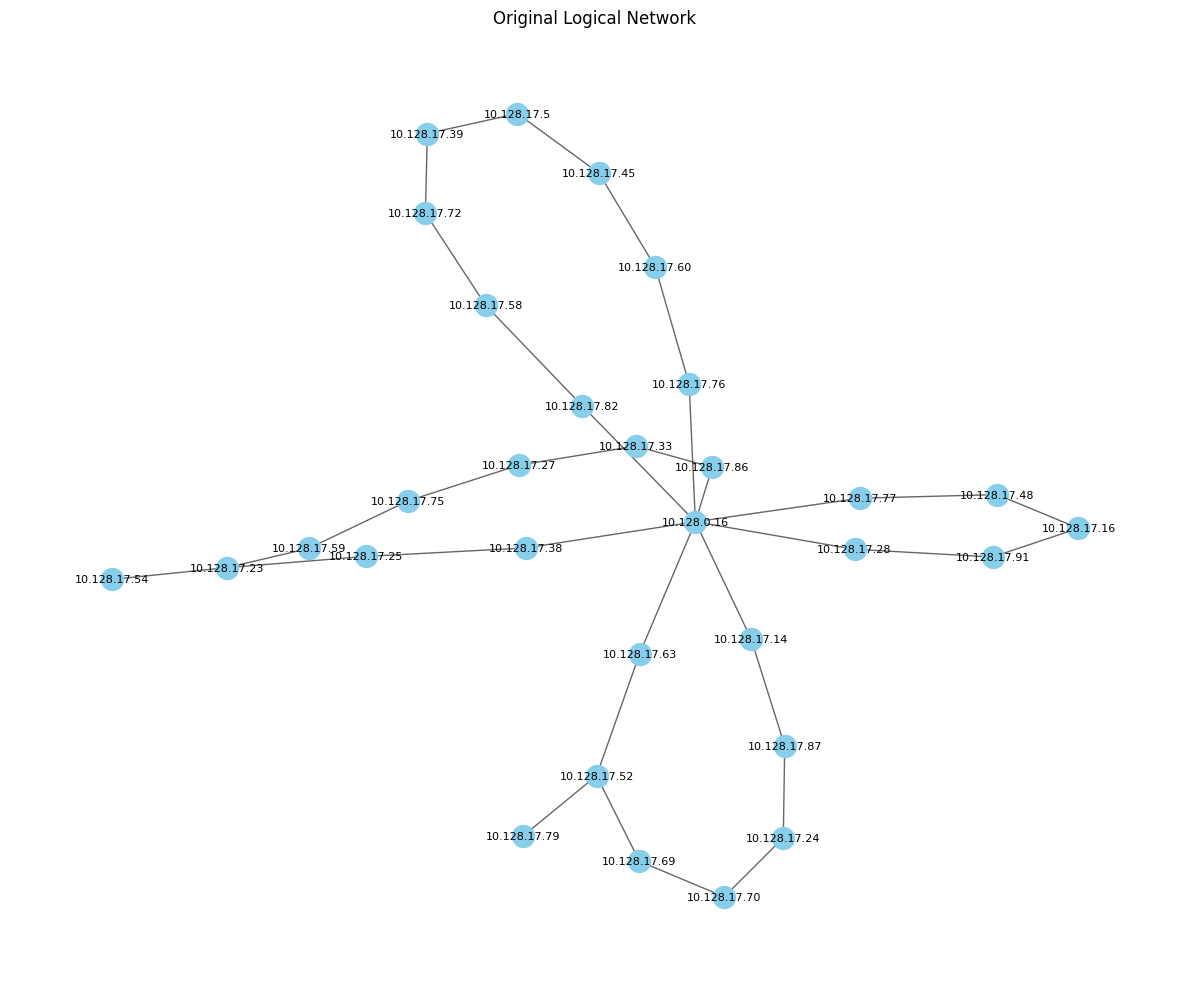


Plotting graph with UPS devices...


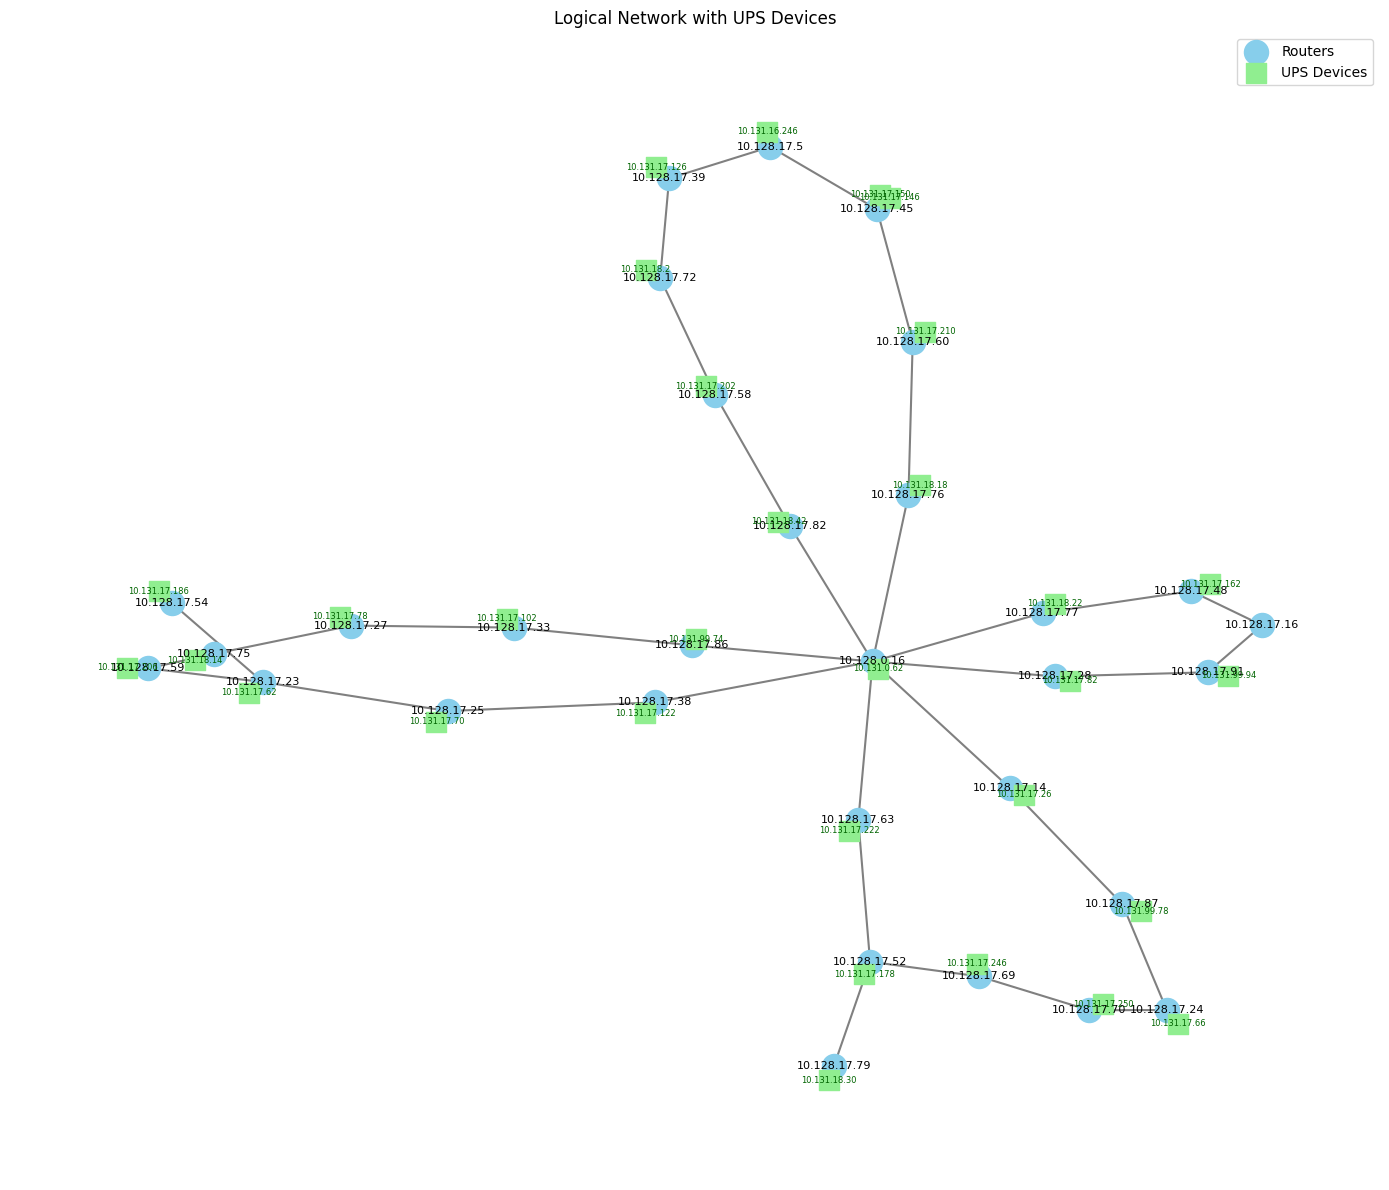

In [20]:
def plot_logical_graph(G, title="Logical Network Graph", figsize=(12, 10)):
    """
    Plot the original logical network graph
    
    Parameters:
    -----------
    G : NetworkX Graph
        The original logical graph
    title : str
        Plot title
    figsize : tuple
        Figure size (width, height)
    """
    import matplotlib.pyplot as plt
    import networkx as nx
    
    plt.figure(figsize=figsize)
    
    # Use spring layout
    pos = nx.spring_layout(G, seed=42)
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=250)
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, alpha=0.6)
    
    # Draw labels with smaller font
    labels = {node: node for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=8)
    
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
def plot_graph_with_ups(G, title="Network Graph with UPS Devices", figsize=(14, 12)):
    """
    Plot the network graph with UPS devices as distinct nodes
    
    Parameters:
    -----------
    G : NetworkX Graph
        The graph with UPS nodes added
    title : str
        Plot title
    figsize : tuple
        Figure size (width, height)
    """
    import matplotlib.pyplot as plt
    import networkx as nx
    
    plt.figure(figsize=figsize)
    
    # Use spring layout but adjust for UPS nodes
    pos = nx.spring_layout(G, seed=42)
    
    # Separate UPS nodes and router nodes
    ups_nodes = [n for n, d in G.nodes(data=True) if d.get('is_ups', False)]
    router_nodes = [n for n in G.nodes() if n not in ups_nodes]
    
    # Adjust positions to make UPS nodes appear as spurs
    for ups_node in ups_nodes:
        # Find the router connected to this UPS
        for router in G.neighbors(ups_node):
            if router in router_nodes:
                # Move UPS node closer to its router
                router_pos = pos[router]
                # Calculate position 80% of the way from router to original UPS position
                pos[ups_node] = (
                    0.2 * pos[ups_node][0] + 0.8 * router_pos[0],
                    0.2 * pos[ups_node][1] + 0.8 * router_pos[1]
                )
                # Only adjust for the first router found
                break
    
    # Draw router nodes
    nx.draw_networkx_nodes(G, pos, nodelist=router_nodes, 
                          node_color='skyblue', node_size=300, 
                          label='Routers')
    
    # Draw UPS nodes
    nx.draw_networkx_nodes(G, pos, nodelist=ups_nodes, 
                          node_color='lightgreen', node_size=200, 
                          node_shape='s', label='UPS Devices')
    
    # Draw edges between routers
    router_edges = [(u, v) for u, v in G.edges() 
                   if u in router_nodes and v in router_nodes]
    nx.draw_networkx_edges(G, pos, edgelist=router_edges, 
                          edge_color='gray', width=1.5)
    
    # Draw edges connecting to UPS nodes
    ups_edges = [(u, v) for u, v in G.edges() 
                if (u in ups_nodes or v in ups_nodes)]
    nx.draw_networkx_edges(G, pos, edgelist=ups_edges, 
                          edge_color='green', width=1, style='--')
    
    # Draw labels with smaller font
    router_labels = {node: node for node in router_nodes}
    ups_labels = {node: node for node in ups_nodes}
    
    # Router labels
    nx.draw_networkx_labels(G, pos, labels=router_labels, font_size=8)
    
    # UPS labels (smaller)
    nx.draw_networkx_labels(G, pos, labels=ups_labels, font_size=6, 
                           font_color='darkgreen')
    
    plt.title(title)
    plt.legend()
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot both graphs
print("Plotting original logical graph...")
plot_logical_graph(G_log, "Original Logical Network")

print("\nPlotting graph with UPS devices...")
plot_graph_with_ups(G_log_with_ups, "Logical Network with UPS Devices")

In [35]:
for node in G_log_with_ups.nodes():
    G_log_with_ups.nodes[node]['has_ups_low_battery'] = False

In [39]:
# Print all nodes and their attributes
for node, attrs in G_log_with_ups.nodes(data=True):
    print(f"Node: {node}")
    print(f"  Attributes: {attrs}")
    print("  ---")

Node: 10.128.17.58
  Attributes: {'name': 'LENGVARA', 'has_ups_low_battery': False}
  ---
Node: 10.128.17.72
  Attributes: {'name': 'SARDA', 'has_ups_low_battery': False}
  ---
Node: 10.128.17.39
  Attributes: {'name': 'JAMGAON', 'has_ups_low_battery': False}
  ---
Node: 10.128.17.5
  Attributes: {'name': 'BAHINGA', 'has_ups_low_battery': False}
  ---
Node: 10.128.17.45
  Attributes: {'name': 'KHAMHARIYA', 'has_ups_low_battery': False}
  ---
Node: 10.128.17.60
  Attributes: {'name': 'MOHABHATTA', 'has_ups_low_battery': False}
  ---
Node: 10.128.17.76
  Attributes: {'name': 'SIVAR', 'has_ups_low_battery': False}
  ---
Node: 10.128.0.16
  Attributes: {'name': 'BERLA', 'has_ups_low_battery': False}
  ---
Node: 10.128.17.14
  Attributes: {'name': 'BHATGAON', 'has_ups_low_battery': False}
  ---
Node: 10.128.17.87
  Attributes: {'name': 'BEHARGHAT', 'has_ups_low_battery': False}
  ---
Node: 10.128.17.24
  Attributes: {'name': 'DANGANIYA B', 'has_ups_low_battery': False}
  ---
Node: 10.128.17

In [36]:
router = G_log_with_ups.neighbors("10.131.99.94")
router = list(router)[0]

In [37]:
G_log_with_ups.nodes[router]['has_ups_low_battery'] = True

In [43]:
G_log_with_ups.nodes["10.131.99.94"]['has_ups_low_battery'] = True
G_log_with_ups.nodes["10.131.99.94"]['NE_TIME'] = "2025-03-27 12:00:00"

In [44]:
G_log_with_ups.nodes["10.128.0.16"]['failed'] = True
G_log_with_ups.nodes["10.128.0.16"]['NE_TIME'] = "2025-03-27 13:00:00"

In [45]:
G_log_with_ups.nodes["10.128.0.16"]["is_block"] = True

In [46]:
for node in G_log_with_ups.nodes():
    if node == "10.128.0.16":
        continue
    G_log_with_ups.nodes[node]['block_ip'] ="10.128.0.16"    

In [47]:
# Print all nodes and their attributes
for node, attrs in G_log_with_ups.nodes(data=True):
    print(f"Node: {node}")
    print(f"  Attributes: {attrs}")
    print("  ---")

Node: 10.128.17.58
  Attributes: {'name': 'LENGVARA', 'has_ups_low_battery': False, 'block_ip': '10.128.0.16'}
  ---
Node: 10.128.17.72
  Attributes: {'name': 'SARDA', 'has_ups_low_battery': False, 'block_ip': '10.128.0.16'}
  ---
Node: 10.128.17.39
  Attributes: {'name': 'JAMGAON', 'has_ups_low_battery': False, 'block_ip': '10.128.0.16'}
  ---
Node: 10.128.17.5
  Attributes: {'name': 'BAHINGA', 'has_ups_low_battery': False, 'block_ip': '10.128.0.16'}
  ---
Node: 10.128.17.45
  Attributes: {'name': 'KHAMHARIYA', 'has_ups_low_battery': False, 'block_ip': '10.128.0.16'}
  ---
Node: 10.128.17.60
  Attributes: {'name': 'MOHABHATTA', 'has_ups_low_battery': False, 'block_ip': '10.128.0.16'}
  ---
Node: 10.128.17.76
  Attributes: {'name': 'SIVAR', 'has_ups_low_battery': False, 'block_ip': '10.128.0.16'}
  ---
Node: 10.128.0.16
  Attributes: {'name': 'BERLA', 'has_ups_low_battery': False, 'failed': True, 'NE_TIME': '2025-03-27 13:00:00', 'is_block': True}
  ---
Node: 10.128.17.14
  Attributes:

In [42]:
router

'10.128.17.91'

In [41]:
# Safely check for has_ups_low_battery attribute
for node in G_log_with_ups.nodes:
    if G_log_with_ups.nodes[node].get('has_ups_low_battery', False):
        print(node)

10.128.17.91


In [ ]:
class UPSLowBatteryDataset(Dataset):
    def __init__(self, G_log_with_ups, root="./data/ups_low_battery", transform=None, pre_transform=None, 
                 n_positive=1000, n_negative=1000):
        self.G = G_log_with_ups  # Use the provided graph with UPS nodes
        self.n_positive = n_positive
        self.n_negative = n_negative
        self.data_list = []  # Store data objects in memory
        self.node_map = {node: i for i, node in enumerate(self.G.nodes())}   
        self.idx_to_ip = {i: node for node, i in self.node_map.items()}
        
        print("Initializing UPS low battery dataset...")
        super().__init__(root, transform, pre_transform)
        
        # Check if data was loaded
        print(f"Dataset initialized with {len(self.data_list)} examples")
    
    @property
    def raw_file_names(self):
        return ['dummy.txt']  # We don't need raw files since we use the provided graph
    
    @property
    def processed_file_names(self):
        # Used to check if processing is needed
        return ['ups_low_battery_data.pt']
    
    def download(self):
        # No need to download anything
        with open(self.raw_paths[0], 'w') as f:
            f.write("Placeholder file for UPS low battery dataset")
    
    def process(self):
        print("Processing UPS low battery dataset...")
        G = self.G
        
        # Reset all battery status attributes
        for node in G.nodes():
            G.nodes[node]['_ups_low_battery'] = False
            G.nodes[node]['has_ups_low_battery'] = False
        
        # Get all router nodes (not UPS nodes)
        router_nodes = [node for node, data in G.nodes(data=True) 
                       if not data.get('is_ups', False)]
        
        # Get all UPS nodes
        ups_nodes = [node for node, data in G.nodes(data=True) 
                    if data.get('is_ups', False)]
        
        if not ups_nodes:
            print("WARNING: No UPS nodes found in the graph!")
            return
        
        print(f"Found {len(router_nodes)} routers and {len(ups_nodes)} UPS devices")
        
        # Generate positive examples
        positive_count = 0
        router_ups_pairs = []
        
        # Find all router-UPS pairs
        for router in router_nodes:
            connected_ups = []
            for neighbor in G.neighbors(router):
                if G.nodes[neighbor].get('is_ups', False):
                    connected_ups.append(neighbor)
            
            if connected_ups:
                router_ups_pairs.append((router, connected_ups))
        
        if not router_ups_pairs:
            print("WARNING: No router-UPS pairs found in the graph!")
            return
        
        print(f"Found {len(router_ups_pairs)} routers with connected UPS devices")
        
        print(f"Generating {self.n_positive} positive examples...")
        with tqdm(total=self.n_positive) as pbar:
            while positive_count < self.n_positive and router_ups_pairs:
                try:
                    # Randomly select a router with UPS
                    router, connected_ups = random.choice(router_ups_pairs)
                    
                    # Create a copy of the graph
                    G_example = G.copy()
                    
                    # Reset all battery statuses
                    for node in G_example.nodes():
                        G_example.nodes[node]['_ups_low_battery'] = False
                        G_example.nodes[node]['has_ups_low_battery'] = False
                    
                    # Randomly select one of the connected UPS to have low battery
                    target_ups = random.choice(connected_ups)
                    
                    # Set UPS to have low battery
                    G_example.nodes[target_ups]['_ups_low_battery'] = True
                    
                    # Set router to have UPS with low battery
                    G_example.nodes[router]['has_ups_low_battery'] = True
                    
                    # Set some random routers to also have UPS with low battery (distractors)
                    other_routers = [r for r in router_nodes if r != router]
                    if other_routers:
                        num_distractors = random.randint(1, min(5, len(other_routers)))
                        distractor_routers = random.sample(other_routers, num_distractors)
                        
                        for distractor in distractor_routers:
                            G_example.nodes[distractor]['has_ups_low_battery'] = True
                            
                            # Also set one of their UPS to have low battery
                            distractor_ups = []
                            for neighbor in G_example.neighbors(distractor):
                                if G_example.nodes[neighbor].get('is_ups', False):
                                    distractor_ups.append(neighbor)
                            
                            if distractor_ups:
                                random_ups = random.choice(distractor_ups)
                                G_example.nodes[random_ups]['_ups_low_battery'] = True
                    
                    # Create PyTorch Geometric data object
                    data = self._convert_to_pytorch_geometric(
                        G_example, 
                        input_node=router,
                        target_ups=target_ups,
                        has_target=True
                    )
                    
                    # Add to data list
                    self.data_list.append(data)
                    positive_count += 1
                    pbar.update(1)
                    
                except Exception as e:
                    print(f"Error generating positive example: {e}")
                    # Skip this example and continue
                    continue
        
        # Generate negative examples  
        print(f"Generating {self.n_negative} negative examples...")
        negative_count = 0
        
        with tqdm(total=self.n_negative) as pbar:
            while negative_count < self.n_negative and router_nodes:
                try:
                    # Randomly select a router
                    router = random.choice(router_nodes)
                    
                    # Create a fresh copy of the graph
                    G_example = G.copy()
                    
                    # Reset all battery statuses
                    for node in G_example.nodes():
                        G_example.nodes[node]['_ups_low_battery'] = False
                        G_example.nodes[node]['has_ups_low_battery'] = False
                    
                    # Set router to NOT have UPS with low battery (for negative examples)
                    G_example.nodes[router]['has_ups_low_battery'] = False
                    
                    # Ensure any connected UPS don't have low battery
                    for neighbor in G_example.neighbors(router):
                        if G_example.nodes[neighbor].get('is_ups', False):
                            G_example.nodes[neighbor]['_ups_low_battery'] = False
                    
                    # Set some random other routers to have low battery UPS
                    other_routers = [r for r in router_nodes if r != router]
                    if other_routers:
                        num_routers_with_low_battery = random.randint(1, min(5, len(other_routers)))
                        routers_with_low_battery = random.sample(other_routers, num_routers_with_low_battery)
                        
                        for low_batt_router in routers_with_low_battery:
                            G_example.nodes[low_batt_router]['has_ups_low_battery'] = True
                            
                            # Find its UPS connections
                            router_ups = []
                            for neighbor in G_example.neighbors(low_batt_router):
                                if G_example.nodes[neighbor].get('is_ups', False):
                                    router_ups.append(neighbor)
                            
                            if router_ups:
                                random_ups = random.choice(router_ups)
                                G_example.nodes[random_ups]['_ups_low_battery'] = True
                    
                    # Create data object with no target UPS
                    data = self._convert_to_pytorch_geometric(
                        G_example, 
                        input_node=router,
                        target_ups=None,
                        has_target=False
                    )
                    
                    # Add to data list
                    self.data_list.append(data)
                    negative_count += 1
                    pbar.update(1)
                    
                except Exception as e:
                    print(f"Error generating negative example: {e}")
                    continue
        
        # Save a token file to mark processing as complete
        torch.save({"status": "complete"}, self.processed_paths[0])
        print(f"Dataset processing complete. Created {len(self.data_list)} examples.")
    
    def _convert_to_pytorch_geometric(self, G, input_node, target_ups=None, has_target=False):
        """Convert NetworkX graph to PyTorch Geometric Data object for UPS low battery prediction."""
        # Create edge index
        edge_list = list(G.edges())
        edge_index = []
        for u, v in edge_list:
            edge_index.append([self.node_map[u], self.node_map[v]])
            edge_index.append([self.node_map[v], self.node_map[u]])
        
        # Create node features
        x = []
        for node in G.nodes():
            # Feature 1: Is this the input router?
            is_input = 1.0 if node == input_node else 0.0
            
            # Feature 2: Is this a UPS device?
            is_ups = 1.0 if G.nodes[node].get('is_ups', False) else 0.0
            
            # Feature 3: Does this router have UPS with low battery?
            has_low_battery = 1.0 if G.nodes[node].get('has_ups_low_battery', False) else 0.0
            
            # Feature 4: Is this UPS reporting low battery?
            ups_low_battery = 1.0 if G.nodes[node].get('_ups_low_battery', False) else 0.0
            
            x.append([is_input, is_ups, has_low_battery, ups_low_battery])
        
        # Create target mask (which node is the target UPS with low battery)
        y_mask = torch.zeros(len(G.nodes()), dtype=torch.bool)
        if has_target and target_ups is not None:
            y_mask[self.node_map[target_ups]] = True
        
        # Create PyTorch Geometric Data object
        data = Data(
            x=torch.tensor(x, dtype=torch.float),
            edge_index=torch.tensor(edge_index, dtype=torch.long).t().contiguous(),
            y=y_mask,
            has_target=torch.tensor([has_target], dtype=torch.bool),
            input_idx=torch.tensor([self.node_map[input_node]], dtype=torch.long)
        )
        
        return data
    
    def len(self):
        return len(self.data_list)
    
    def get(self, idx):
        return self.data_list[idx]

In [2]:
%pip install pgmpy

  Using cached pgmpy-0.1.26-py3-none-any.whl.metadata (9.1 kB)
  Using cached statsmodels-0.14.4-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached xgboost-3.0.0-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
  Using cached google_generativeai-0.8.4-py3-none-any.whl.metadata (4.2 kB)
  Using cached google_ai_generativelanguage-0.6.15-py3-none-any.whl.metadata (5.7 kB)
  Using cached google_api_core-2.24.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached google_auth-2.38.0-py2.py3-none-any.whl.metadata (4.8 kB)
  Using cached proto_plus-1.26.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
  Using cached cachetools-5.5.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached rsa-4.9-py3-none-any.whl.metadata (4.2 kB)
  Using cached google_auth_httplib2-0.2.0-py2.py3-none-any.whl.metadata (2.2 kB)
  Using cached uritemplate-4.

In [17]:
import pandas as pd
import numpy as np
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import random
from tqdm import tqdm

def generate_simple_rca_data(num_samples=1000):
    """Generate simple RCA training data with priority rules"""
    data = []
    
    for _ in tqdm(range(num_samples)):
        # Randomly assign root causes
        has_ups_low_battery = random.random() < 0.3
        has_link_down = random.random() < 0.2
        block_failed = random.random() < 0.2
        # Apply the priority rule
        if block_failed:
            rca = "BLOCK_FAILED"
        elif has_ups_low_battery:
            rca = "UPS_LOW_BATTERY"
        elif has_link_down:
            rca = "LINK_DOWN"
        else:
            rca = "UNKNOWN"
        
        # Add row to dataset
        data.append({
            'has_ups_low_battery': int(has_ups_low_battery),
            'has_link_down': int(has_link_down),
            'block_failed': int(block_failed),
            'rca': rca
        })
    
    return pd.DataFrame(data)

In [18]:
def predict_simple_rca(model, has_ups_low_battery, has_link_down, block_failed):
    """Predict RCA using the simple model"""
    # Create inference engine
    inference = VariableElimination(model)
    
    # Set evidence
    evidence = {
        'has_ups_low_battery': int(has_ups_low_battery),
        'has_link_down': int(has_link_down),
        'block_failed': int(block_failed)
    }
    
    # Query the model
    result = inference.query(variables=['rca'], evidence=evidence)
    
    # Get probability distribution
    prob_dist = {state: float(prob) for state, prob in 
                zip(result.state_names['rca'], result.values)}
    
    # Find most probable RCA
    most_probable_rca = max(prob_dist.items(), key=lambda x: x[1])[0]
    
    return most_probable_rca, prob_dist

In [20]:
def build_simple_rca_model(training_data):
    """Build a simple Bayesian Network for RCA"""
    # Define model structure
    model = BayesianNetwork([
        ('has_ups_low_battery', 'rca'),
        ('has_link_down', 'rca'),
        ('block_failed', 'rca')
    ])
    
    # Fit model parameters
    model.fit(training_data, estimator=MaximumLikelihoodEstimator)
    
    print("Bayesian Network model built and trained")
    return model

In [21]:
training_data = generate_simple_rca_data(1000)

100%|██████████| 1000/1000 [00:00<00:00, 1294538.27it/s]


In [22]:
rca_model = build_simple_rca_model(training_data)

Bayesian Network model built and trained


In [25]:
test_cases = [
        {"name": "UPS Low Battery Only", "ups": True, "link": False, "block": False},
        {"name": "Link Down Only", "ups": False, "link": True, "block": False},
        {"name": "Both Issues", "ups": True, "link": True, "block": False},
        {"name": "No Issues", "ups": False, "link": False, "block": False},
        {"name": "Block Failed", "ups": False, "link": False, "block": True}
    ]
for case in test_cases:
    rca, probs = predict_simple_rca(rca_model, case["ups"], case["link"],case["block"])
    print(f"\nScenario: {case['name']}")
    print(f"  Predicted RCA: {rca}")
    print(f"  Probabilities: {probs}")


Scenario: UPS Low Battery Only
  Predicted RCA: UPS_LOW_BATTERY
  Probabilities: {'BLOCK_FAILED': 0.0, 'LINK_DOWN': 0.0, 'UNKNOWN': 0.0, 'UPS_LOW_BATTERY': 1.0}

Scenario: Link Down Only
  Predicted RCA: LINK_DOWN
  Probabilities: {'BLOCK_FAILED': 0.0, 'LINK_DOWN': 1.0, 'UNKNOWN': 0.0, 'UPS_LOW_BATTERY': 0.0}

Scenario: Both Issues
  Predicted RCA: UPS_LOW_BATTERY
  Probabilities: {'BLOCK_FAILED': 0.0, 'LINK_DOWN': 0.0, 'UNKNOWN': 0.0, 'UPS_LOW_BATTERY': 1.0}

Scenario: No Issues
  Predicted RCA: UNKNOWN
  Probabilities: {'BLOCK_FAILED': 0.0, 'LINK_DOWN': 0.0, 'UNKNOWN': 1.0, 'UPS_LOW_BATTERY': 0.0}

Scenario: Block Failed
  Predicted RCA: BLOCK_FAILED
  Probabilities: {'BLOCK_FAILED': 1.0, 'LINK_DOWN': 0.0, 'UNKNOWN': 0.0, 'UPS_LOW_BATTERY': 0.0}


In [15]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from pgmpy.inference import VariableElimination

In [27]:
def visualize_bayesian_network(model, target_node=None, evidence_nodes=None, node_colors=None):
    """
    Generic visualization of a Bayesian Network model
    
    Parameters:
    -----------
    model : BayesianNetwork
        The pgmpy Bayesian Network model to visualize
    target_node : str, optional
        The node to query (if None, no probability tables are displayed)
    evidence_nodes : list, optional
        List of nodes to use as evidence variables
    node_colors : dict, optional
        Dictionary mapping node names to colors
    """
    import matplotlib.pyplot as plt
    import networkx as nx
    import pandas as pd
    import itertools
    from pgmpy.inference import VariableElimination
    
    # 1. Network Structure Visualization
    plt.figure(figsize=(10, 6))
    G = nx.DiGraph()
    
    # Add edges from the model
    for edge in model.edges():
        G.add_edge(edge[0], edge[1])
    
    # Set node colors - use default colors if not provided
    if node_colors is None:
        if target_node:
            node_colors = {node: 'lightgreen' if node == target_node else 'lightblue' for node in G.nodes()}
        else:
            node_colors = {node: 'lightblue' for node in G.nodes()}
    
    # Convert node colors dict to list in the order of G.nodes()
    node_color_list = [node_colors.get(node, 'lightblue') for node in G.nodes()]
    
    # Draw the network
    pos = nx.spring_layout(G, seed=42)
    nx.draw_networkx_nodes(G, pos, node_color=node_color_list, node_size=2000)
    nx.draw_networkx_edges(G, pos, width=2, arrowsize=20)
    nx.draw_networkx_labels(G, pos, font_size=14)
    
    plt.title("Bayesian Network Structure", fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    # 2. Display CPTs
    print("\nConditional Probability Tables:")
    for node in model.nodes():
        cpd = model.get_cpds(node)
        print(f"\nCPD for {node}:")
        print(cpd)
    
    # Exit if no target node specified or no evidence nodes
    if target_node is None or evidence_nodes is None or len(evidence_nodes) == 0:
        return
    
    # Set up inference engine
    inference = VariableElimination(model)
    
    # Get possible states for each evidence node
    evidence_states = {}
    for node in evidence_nodes:
        cpd = model.get_cpds(node)
        if hasattr(cpd, 'state_names') and node in cpd.state_names:
            evidence_states[node] = cpd.state_names[node]
        else:
            # Default to binary states if state names not available
            evidence_states[node] = [0, 1]
    
    # Create all possible evidence combinations
    evidence_combos = []
    for combo in itertools.product(*[evidence_states[node] for node in evidence_nodes]):
        evidence_dict = {node: value for node, value in zip(evidence_nodes, combo)}
        evidence_combos.append(evidence_dict)
    
    # 3. Probability Distribution Table
    rows = []
    for evidence in evidence_combos:
        # Query model
        result = inference.query(variables=[target_node], evidence=evidence)
        
        # Get probabilities
        probs = {}
        for i, state in enumerate(result.state_names[target_node]):
            probs[f"P({state})"] = result.values[i]
        
        # Add to rows
        row_data = {node: val for node, val in evidence.items()}
        row_data.update(probs)
        rows.append(row_data)
    
    # Create DataFrame
    df = pd.DataFrame(rows)
    
    # Print probability table
    print("\nProbability Distribution Table:")
    pd.set_option('display.precision', 3)
    print(df)
    
    # 4. Probability heatmap table
    plt.figure(figsize=(12, 6))
    ax = plt.subplot(111, frame_on=False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    
    data = []
    for _, row in df.iterrows():
        data_row = [row[node] for node in evidence_nodes]
        
        # Add each target node probability
        for col in df.columns:
            if col.startswith('P('):
                data_row.append(f"{row[col]:.3f}")
        
        data.append(data_row)
    
    # Column headers
    columns = evidence_nodes.copy()
    for col in df.columns:
        if col.startswith('P('):
            columns.append(col)
    
    # Create table
    table = plt.table(
        cellText=data,
        colLabels=columns,
        loc='center',
        cellLoc='center'
    )
    
    # Style table
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.5)
    
    # Highlight cells based on probability values
    prob_cols = [i for i, col in enumerate(columns) if col.startswith('P(')]
    for i in range(len(data)):
        for j in prob_cols:
            val = float(data[i][j])
            table[(i+1, j)].set_facecolor(plt.cm.Blues(val))
    
    plt.title(f'{target_node} Probability Distribution', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # 5. Comparative Bar Chart
    plt.figure(figsize=(12, 6))
    
    # Reshape data for plotting
    plot_data = []
    
    for i, row in df.iterrows():
        # Create scenario name based on evidence values
        scenario_parts = []
        for node in evidence_nodes:
            scenario_parts.append(f"{node}={row[node]}")
        scenario_name = ", ".join(scenario_parts)
        
        for col in df.columns:
            if col.startswith('P('):
                outcome_type = col[2:-1]  # Remove P( and )
                plot_data.append({
                    'Scenario': scenario_name,
                    f'{target_node} Value': outcome_type,
                    'Probability': row[col]
                })
    
    # Create DataFrame for plotting
    plot_df = pd.DataFrame(plot_data)
    
    # Create pivot table for grouped bars
    pivot_df = plot_df.pivot(index='Scenario', columns=f'{target_node} Value', values='Probability')
    
    # Plot
    ax = pivot_df.plot(kind='bar', figsize=(12, 6))
    plt.title(f'{target_node} Probability by Scenario', fontsize=16)
    plt.xlabel('Scenario')
    plt.ylabel('Probability')
    plt.ylim(0, 1.0)
    plt.legend(title=f'{target_node} Value')
    
    # Add value labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f')
    
    plt.tight_layout()
    plt.show()

In [11]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


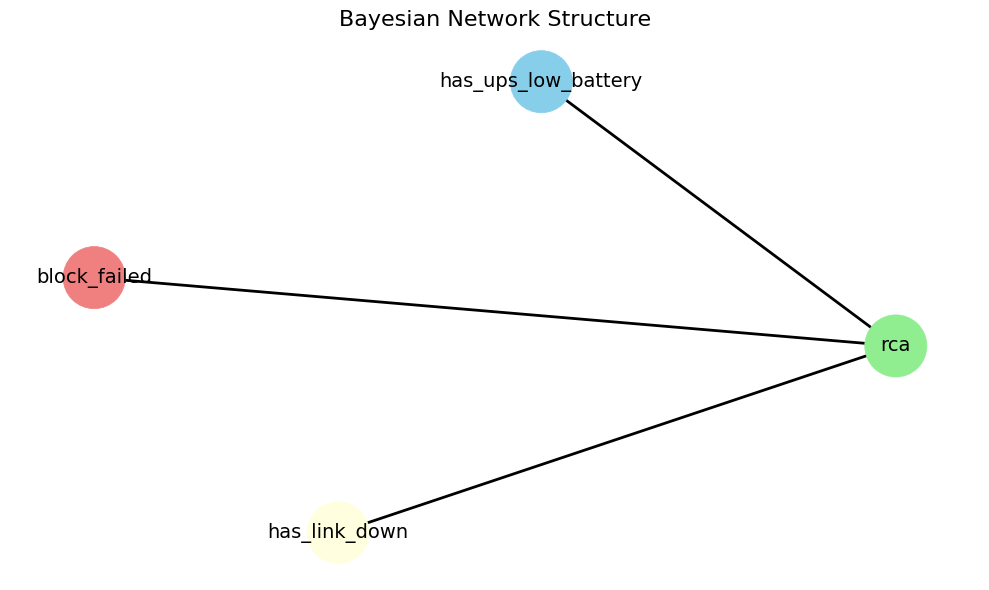


Conditional Probability Tables:

CPD for has_ups_low_battery:
+------------------------+-------+
| has_ups_low_battery(0) | 0.713 |
+------------------------+-------+
| has_ups_low_battery(1) | 0.287 |
+------------------------+-------+

CPD for rca:
+----------------------+-----+------------------------+
| block_failed         | ... | block_failed(1)        |
+----------------------+-----+------------------------+
| has_link_down        | ... | has_link_down(1)       |
+----------------------+-----+------------------------+
| has_ups_low_battery  | ... | has_ups_low_battery(1) |
+----------------------+-----+------------------------+
| rca(BLOCK_FAILED)    | ... | 1.0                    |
+----------------------+-----+------------------------+
| rca(LINK_DOWN)       | ... | 0.0                    |
+----------------------+-----+------------------------+
| rca(UNKNOWN)         | ... | 0.0                    |
+----------------------+-----+------------------------+
| rca(UPS_LOW_BATTER

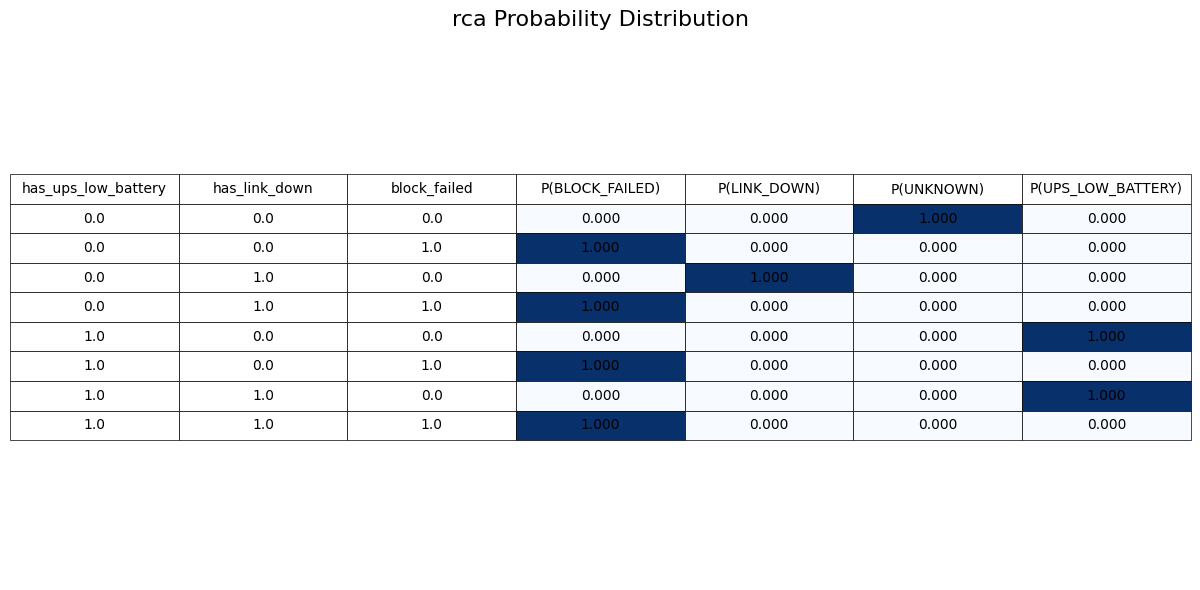

<Figure size 1200x600 with 0 Axes>

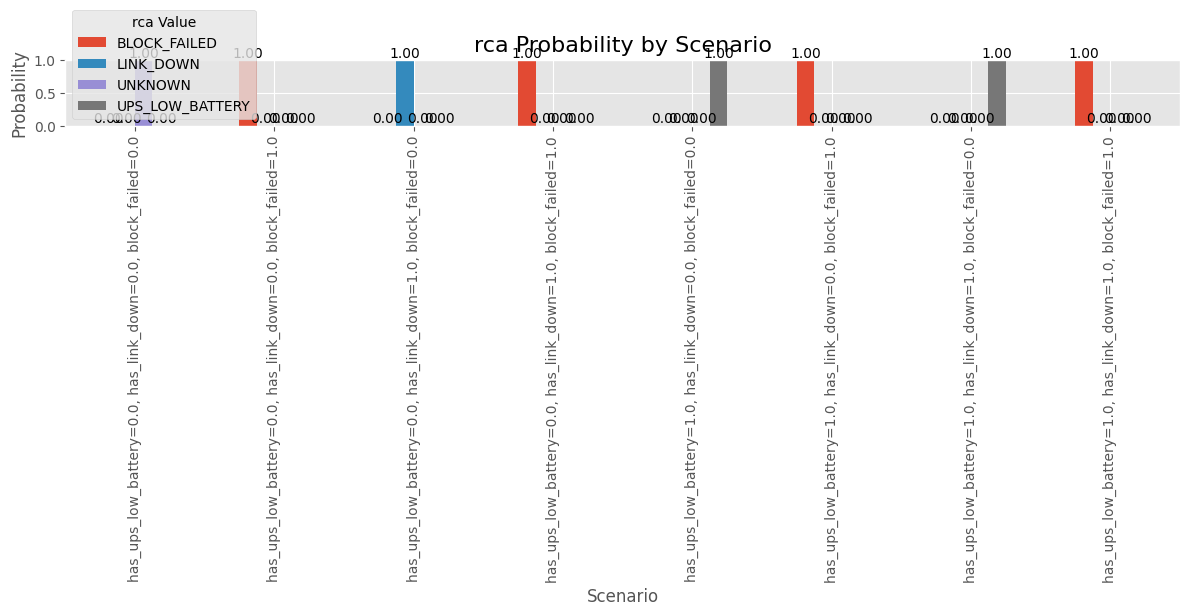

In [28]:
visualize_bayesian_network(
    model=rca_model,
    target_node='rca',
    evidence_nodes=['has_ups_low_battery', 'has_link_down', 'block_failed'],
    node_colors={'rca': 'lightgreen', 'has_ups_low_battery': 'skyblue', 
                 'has_link_down': 'lightyellow', 'block_failed': 'lightcoral'}
)